# P300 pipeline for machine learning methods

## Packages

- statsmodels
- expit

## Dataset (one subject)

### Load Dataset (one subject)

In [1]:
from braindecode.datasets import MOABBDataset

# all subjects (BNCI2014_009 has 10 subjects)
dataset_full = MOABBDataset(dataset_name="BNCI2014_009")

print("Number of recordings:", len(dataset_full.datasets))
print(dataset_full.description.head())
print(dataset_full.description.columns)

/opt/anaconda3/envs/P300_pipeline/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of recordings: 30
   subject session run
0        1       0   0
1        1       1   0
2        1       2   0
3        2       0   0
4        2       1   0
Index(['subject', 'session', 'run'], dtype='object')


In [30]:
subject_id = 1
dataset = MOABBDataset(dataset_name="BNCI2014_009", subject_ids=[subject_id])

In [31]:
dataset.datasets[0].raw.ch_names


['Fz',
 'Cz',
 'Pz',
 'Oz',
 'P3',
 'P4',
 'PO7',
 'PO8',
 'F3',
 'F4',
 'FCz',
 'C3',
 'C4',
 'CP3',
 'CPz',
 'CP4',
 'Target stim',
 'Flash stim']

## Dataset (1 subject, only 8 channels)

In [1]:
from braindecode.datasets import MOABBDataset

# all subjects (BNCI2014_009 has 10 subjects)
dataset_full = MOABBDataset(dataset_name="BNCI2014_009")

print("Number of recordings:", len(dataset_full.datasets))
print(dataset_full.description.head())
print(dataset_full.description.columns)

/opt/anaconda3/envs/P300_pipeline/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of recordings: 30
   subject session run
0        1       0   0
1        1       1   0
2        1       2   0
3        2       0   0
4        2       1   0
Index(['subject', 'session', 'run'], dtype='object')


In [2]:
subject_id = 1
dataset = MOABBDataset(dataset_name="BNCI2014_009", subject_ids=[subject_id])

### I want to take the same channels that the hybrid black device has

In [3]:
raw = dataset.datasets[0].raw

print("Number of channels:", len(raw.ch_names))
print("Channel names:")
print(raw.ch_names)


Number of channels: 18
Channel names:
['Fz', 'Cz', 'Pz', 'Oz', 'P3', 'P4', 'PO7', 'PO8', 'F3', 'F4', 'FCz', 'C3', 'C4', 'CP3', 'CPz', 'CP4', 'Target stim', 'Flash stim']


In [4]:
unicorn_channels = [
    "Fz",
    "C3",
    "Cz",
    "C4",
    "Pz",
    "PO7",
    "Oz",
    "PO8",
]

for ds in dataset.datasets:
    ds.raw.pick_channels(unicorn_channels)

raw = dataset.datasets[0].raw

print("Channels after selection:", raw.ch_names)
print("Number of channels after selection:", len(raw.ch_names))




NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Channels after selection: ['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8']
Number of channels after selection: 8


## Dataset (all people + 8 channels)

In [29]:
from braindecode.datasets import MOABBDataset

dataset = MOABBDataset(dataset_name="BNCI2014_009")  # all subjects by default
print("Number of recordings:", len(dataset.datasets))
print("Unique subjects:", sorted(dataset.description["subject"].unique()))

Number of recordings: 30
Unique subjects: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [27]:
unicorn_channels = ["Fz", "C3", "Cz", "C4", "Pz", "PO7", "Oz", "PO8"]

for ds in dataset.datasets:
    ds.raw.pick_channels(unicorn_channels)

raw0 = dataset.datasets[0].raw
print("Channels after picking:", raw0.ch_names)
print("n_channels:", len(raw0.ch_names))

# quick subject check
print("Subjects:", sorted(dataset.description["subject"].unique()))

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

## Preprocessing

In [30]:
import numpy as np
from braindecode.preprocessing import (
    Preprocessor,
    preprocess,
)

# bandpass filter that matches dataset 
low_cut_hz = 0.1
high_cut_hz = 20.0
factor = 1e6 # to convert from V to uV
#resample_sfreq = 128  # set to none if you want to keep it at 256 Hz

def to_microvolts(data):
    return data * factor

preprocessors = [
    # keep only EEG channels
    Preprocessor("pick_types", eeg=True, meg=False, stim=False),
    # scale the data
    Preprocessor(to_microvolts),
    # bandpass filter for ERPs
    Preprocessor("filter", l_freq=low_cut_hz, h_freq=high_cut_hz),
]

# apply the preprocessors to the dataset
preprocess(dataset, preprocessors, n_jobs=-1)

/scratch/s4776178/projects/p300-personalisation-hyperscanning/.venv/lib/python3.11/site-packages/braindecode/preprocessing/preprocess.py:76: UserWarning: apply_on_array can only be True if fn is a callable function. Automatically correcting to apply_on_array=False.
  warn(


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 8449 samples (33.004 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband rip

## Creating trial windows

In [31]:
from braindecode.preprocessing import create_windows_from_events

# read sampling frequency from the data
sfreq = dataset.datasets[0].raw.info["sfreq"]
print("sampling frequency:", sfreq)

# trial window setting for P300
tmin = 0.0
tmax = 0.8 # P300 window 300ms to 800ms

start_offset = int(np.round(tmin * sfreq))
stop_offset = int(np.round(tmax * sfreq))

# Create windows using braindecode function for this. It needs parameters to define how
# trials should be used.
windows_dataset = create_windows_from_events(
    dataset,
    trial_start_offset_samples=start_offset,
    trial_stop_offset_samples=stop_offset,
    preload=True,
)

print(windows_dataset)
print(windows_dataset.description.head())
print(windows_dataset.description.columns)


sampling frequency: 256.0
   subject session run
0        1       0   0
1        1       1   0
2        1       2   0
3        2       0   0
4        2       1   0
Index(['subject', 'session', 'run'], dtype='object')


In [32]:
# count number of target and non-target trials
y = np.array([windows_dataset[i][1] for i in range(len(windows_dataset))])

n_nontarget = np.sum(y == 0)
n_target = np.sum(y == 1)

print(f"NonTarget (0): {n_nontarget}")
print(f"Target (1): {n_target}")
print(f"Total windows: {len(y)}")



NonTarget (0): 14400
Target (1): 2880
Total windows: 17280


## Splitting the dataset into training and validation sets
- One participant

In [44]:
# check how many sessions 
print(windows_dataset.description["session"].unique())

['0' '1' '2']


In [45]:
from braindecode.datasets import BaseConcatDataset

# Split dataset into training and test based on sessions
splits = windows_dataset.split("session")
session_keys = sorted(list(splits.keys()), key=str)

print("Available sessions:", session_keys)

if len(session_keys) < 2:
    raise RuntimeError("Not enough sessions found for a cross-session split.")

train_keys = session_keys[:-1]
test_key = session_keys[-1]

# Collect datasets for training sessions
train_datasets = []
for k in train_keys:
    train_datasets.extend(splits[k].datasets)

# Build new BaseConcatDataset
train_set = BaseConcatDataset(train_datasets)

# Test set is just one split
test_set = splits[test_key]

print("Train windows:", len(train_set), "Test windows:", len(test_set))
print("Train sessions:", train_keys, "Test session:", test_key)


Available sessions: ['0', '1', '2']
Train windows: 11520 Test windows: 5760
Train sessions: ['0', '1'] Test session: 2


In [46]:
# count number of target and non-target trials in train and test sets
def get_labels_from_base_concat(dataset):
    labels = []
    for ds in dataset.datasets:
        labels.extend(ds.y)
    return np.array(labels)

y_train = get_labels_from_base_concat(train_set)
y_test = get_labels_from_base_concat(test_set)

print("Training set:")
print("  NonTarget:", np.sum(y_train == 0))
print("  Target:", np.sum(y_train == 1))

print("Test set:")
print("  NonTarget:", np.sum(y_test == 0))
print("  Target:", np.sum(y_test == 1))



Training set:
  NonTarget: 9600
  Target: 1920
Test set:
  NonTarget: 4800
  Target: 960


## Splitting dataset into train and test sets
- All participants

In [34]:
from braindecode.datasets import BaseConcatDataset

# choose the held-out participant
test_subject = 10

# split windows by subejct 
by_subject = windows_dataset.split("subject")
subject_keys = sorted(list(by_subject.keys()), key=int)
print("Available subjects:", subject_keys)

# build training set from all but the held-out subject
train_datasets = []
for s in subject_keys:
    if int(s) == int(test_subject):
        continue
    train_datasets.extend(by_subject[s].datasets)

train_set = BaseConcatDataset(train_datasets)
test_set = by_subject[str(test_subject)] if str(test_subject) in by_subject else by_subject[test_subject]

print("Train windows:", len(train_set), "Test windows:", len(test_set))
print("Train subjects:", [s for s in subject_keys if int(s) != int(test_subject)], "Test subject:", test_subject)


Available subjects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
Train windows: 15552 Test windows: 1728
Train subjects: ['1', '2', '3', '4', '5', '6', '7', '8', '9'] Test subject: 10


## Convert braindecode windows to Numpy (X,y)
- Each window is a 2D matrix (channels x time).
- Classic ML models expect 2D input, so we have to build a feature vector
    - y_train and X_train -> (trials, eeg channels, time samples per trial)
    - y_test and X_test -> 1D array as its a vector of labels (0 or 1)

In [35]:
import numpy as np

def bd_to_numpy(ds):
    """
    Convert a braindecode windowed dataset into (X, y).
    X: (n_trials, n_channels, n_times)
    y: (n_trials,)
    """
    X = np.stack([ds[i][0] for i in range(len(ds))]).astype(np.float32)
    y = np.array([ds[i][1] for i in range(len(ds))], dtype=np.int64)
    return X, y

X_train, y_train = bd_to_numpy(train_set)
X_test, y_test = bd_to_numpy(test_set)

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test :", X_test.shape, "y_test :", y_test.shape)


X_train: (15552, 16, 409) y_train: (15552,)
X_test : (1728, 16, 409) y_test : (1728,)


## Groups for CV 
- One participant

In [12]:
from sklearn.model_selection import GroupKFold, cross_val_score

train_meta = train_set.get_metadata()
groups = train_meta["session"].to_numpy()
n_sessions = len(np.unique(groups))

if n_sessions < 2:
    raise RuntimeError("Need at least 2 sessions in training for session-based CV.")

cv = GroupKFold(n_splits=n_sessions)

print("Train windows:", len(train_set), "Test windows:", len(test_set))
print("Train sessions:", train_keys, "Test session:", test_key)


Train windows: 1152 Test windows: 576
Train sessions: ['0', '1'] Test session: 2


## Groups for CV
- All participants

In [36]:
from sklearn.model_selection import LeaveOneGroupOut

train_meta = train_set.get_metadata()
groups = train_meta["subject"].to_numpy()

cv = LeaveOneGroupOut()

print("groups_train:", groups.shape, "unique:", np.unique(groups))

groups_train: (15552,) unique: [1 2 3 4 5 6 7 8 9]


## Groups for CV - less folds

## xDAWN + flatten (optional) 
#### These cells are for no CV and HPO are used in model

- xDAWN learns spatial filters that make the P300 response stand out as clearly as possible from background EEG.
- It linearly combines EEG channels into a few components and those components are chosen to maximise the target ERP signal-to-noise ratio.
- It is supervised and the output is fewer, cleaner "virtual channels" where the P300 peak is much clearer. 

### Make info

In [51]:
import mne 

sfreq = 256.0 # sampling rate of data
ch_names = [f"EEG{i:02d}" for i in range(X_train.shape[1])]
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types="eeg")


### Convert (X,y) into EpochsArray with events

X: (n_trials, n_channels, n_times)\
y: (n_trials,) with 0/1 labels (0=non-target, 1=target)
    

In [52]:
def make_epochs_from_Xy(X, y, info, tmin=0.0):
    X = np.asarray(X)
    y = np.asarray(y).astype(int)

    # Map y=0 -> event 1, y=1 -> event 2
    event_codes = y + 1

    # events: (n_epochs, 3) = [sample, 0, event_id]
    # sample index can be 0..n_epochs-1; it's mostly a placeholder for EpochsArray
    events = np.c_[np.arange(len(y)), np.zeros(len(y), dtype=int), event_codes]

    event_id = {"nontarget": 1, "target": 2}

    epochs = mne.EpochsArray(X, info, events=events, event_id=event_id, tmin=tmin, verbose=False)
    return epochs

epochs_train = make_epochs_from_Xy(X_train, y_train, info)
epochs_test  = make_epochs_from_Xy(X_test,  y_test,  info)

In [53]:
# should match 
if epochs_train.get_data().shape==X_train.shape:
    print("Epochs data shape matches X_train shape.")

Epochs data shape matches X_train shape.


### Note:
- This is to find the optimal n_components used by xDAWN algorithm. 
- If HPO is done later on, xDAWN must be refit every fold.


### Features + flatten

Generator yielding (F_tr_z, y_tr, F_va_z, y_va) for each fold,
with xDAWN fitted inside the fold and features flattened. \
Scaling is NOT done here (each model cell can scale as it prefers).

In [54]:
# keep every 4th time sample to reduce dimensionality
def flatten_features(X, decim=4):
    X_ds = X[:, :, ::decim]
    return X_ds.reshape(X_ds.shape[0], -1)

In [55]:
from mne.preprocessing import Xdawn

decim=2

def get_fold_features_xdawn(X, y, groups, cv, info, n_components, decim=4):
    X = np.asarray(X)
    y = np.asarray(y).astype(int)

    for tr_idx, va_idx in cv.split(X, y, groups):
        X_tr, X_va = X[tr_idx], X[va_idx]
        y_tr, y_va = y[tr_idx], y[va_idx]

        epochs_tr = make_epochs_from_Xy(X_tr, y_tr, info)
        epochs_va = make_epochs_from_Xy(X_va, y_va, info)

        xd = Xdawn(n_components=n_components)
        xd.fit(epochs_tr, y_tr)

        X_tr_xd = xd.transform(epochs_tr)
        X_va_xd = xd.transform(epochs_va)

        F_tr = flatten_features(X_tr_xd, decim=decim)
        F_va = flatten_features(X_va_xd, decim=decim)

        yield F_tr, y_tr, F_va, y_va


### SVM

**Pick `n_components` for SVM using CV**

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import LinearSVC
import numpy as np

components_grid = [2, 4, 6, 8, 10, 12, 14, 16, 18]
decim = 4
svm_C = 1.0

assert len(X_train) == len(y_train) == len(groups)

svm_scores = {}
svm_fold_scores = {}

for k in components_grid:
    fold_scores = []

    for F_tr, y_tr, F_va, y_va in get_fold_features_xdawn(
        X_train, y_train, groups, cv, info, k, decim=decim
    ):
        scaler = StandardScaler()
        F_tr_z = scaler.fit_transform(F_tr)
        F_va_z = scaler.transform(F_va)

        clf = LinearSVC(C=svm_C, class_weight="balanced", dual="auto", max_iter=5000)
        clf.fit(F_tr_z, y_tr)
        y_pred = clf.predict(F_va_z)

        fold_scores.append(balanced_accuracy_score(y_va, y_pred))

    svm_fold_scores[k] = fold_scores
    svm_scores[k] = {"mean": float(np.mean(fold_scores)), "std": float(np.std(fold_scores))}
    print(f"SVM: n_components={k} -> CV bAcc={svm_scores[k]['mean']:.3f} ± {svm_scores[k]['std']:.3f}")

best_k_svm = max(svm_scores, key=lambda kk: svm_scores[kk]["mean"])
print("Best n_components for SVM:", best_k_svm, "score:", svm_scores[best_k_svm])
print("Per-fold scores:", [round(s, 4) for s in svm_fold_scores[best_k_svm]])


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPI

In [57]:
svm_scores

{2: {'mean': 0.7548611111111111, 'std': 0.05751488035821711},
 4: {'mean': 0.7775848765432098, 'std': 0.06082594078357505},
 6: {'mean': 0.7830632716049382, 'std': 0.05843079971421838},
 8: {'mean': 0.7790123456790123, 'std': 0.05824418873546546},
 10: {'mean': 0.7790123456790123, 'std': 0.05824418873546546},
 12: {'mean': 0.7790123456790123, 'std': 0.05824418873546546},
 14: {'mean': 0.7790123456790123, 'std': 0.05824418873546546},
 16: {'mean': 0.7790123456790123, 'std': 0.05824418873546546},
 18: {'mean': 0.7790123456790123, 'std': 0.05824418873546546}}

**Train and test SVM with best `n_components`**

In [58]:
decim = 4
svm_C = 1.0 # regularisation strength of SVM (default 1.0)
k = best_k_svm

epochs_tr = make_epochs_from_Xy(X_train, y_train, info)
epochs_te = make_epochs_from_Xy(X_test,  y_test,  info)

xd = Xdawn(n_components=k)
xd.fit(epochs_tr, y_train)

X_tr_xd = xd.transform(epochs_tr)
X_te_xd = xd.transform(epochs_te)

F_tr = flatten_features(X_tr_xd, decim=decim)
F_te = flatten_features(X_te_xd, decim=decim)

scaler = StandardScaler()
F_tr_z = scaler.fit_transform(F_tr)
F_te_z = scaler.transform(F_te)

clf = LinearSVC(C=svm_C, class_weight="balanced")
clf.fit(F_tr_z, y_train)
y_pred = clf.predict(F_te_z)

bacc = balanced_accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1, keepdims=True)

print("SVM Test balanced accuracy:", float(bacc))
print("Confusion matrix:\n", cm)
print("Normalized confusion matrix:\n", np.round(cm_norm, 3))


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
SVM Test balanced accuracy: 0.871875
Confusion matrix:
 [[1281  159]
 [  42  246]]
Normalized confusion matrix:
 [[0.89  0.11 ]
 [0.146 0.854]]


**Notes:** 
- with decim= 4:
    - Test balanced accuracy: 0.784375
    - best n_components=16 CV: 0.7901041666666666
- decim=2:
    - Test balanced accuracy: 0.7895833333333333
    - best n_components=16 CV: 0.78125
- decim = 1
    - Test balanced accuracy: 0.753125
    - best n_components=16 CV: 0.78125

### LDA

**Pick `n_components` for LDA using CV**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

components_grid = [2, 4, 6, 8, 10, 12, 14, 16, 18]
decim = 4

lda_scores = {}
lda_fold_scores = {}

for k in components_grid:
    fold_scores = []
    for F_tr, y_tr, F_va, y_va in get_fold_features_xdawn(
        X_train, y_train, groups, cv, info, k, decim=decim
    ):
        scaler = StandardScaler()
        F_tr_z = scaler.fit_transform(F_tr)
        F_va_z = scaler.transform(F_va)

        clf = LinearDiscriminantAnalysis()
        clf.fit(F_tr_z, y_tr)
        y_pred = clf.predict(F_va_z)

        fold_scores.append(balanced_accuracy_score(y_va, y_pred))

    lda_fold_scores[k] = fold_scores
    lda_scores[k] = {"mean": float(np.mean(fold_scores)), "std": float(np.std(fold_scores))}
    print(f"LDA: n_components={k} -> CV bAcc={lda_scores[k]['mean']:.3f} ± {lda_scores[k]['std']:.3f}")

best_k_lda = max(lda_scores, key=lambda kk: lda_scores[kk]["mean"])
print("Best n_components for LDA:", best_k_lda, "score:", lda_scores[best_k_lda])
print("Per-fold scores:", [round(s, 4) for s in lda_fold_scores[best_k_lda]])


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPI

In [62]:
lda_scores

{2: 0.6638117283950616,
 4: 0.7210262345679013,
 6: 0.7243055555555555,
 8: 0.7207561728395062,
 10: 0.7207561728395062,
 12: 0.7207561728395062,
 14: 0.7207561728395062,
 16: 0.7207561728395062,
 18: 0.7207561728395062}

**Train and test LDA with best `n_components`**

In [ ]:
decim = 4
k = best_k_lda

epochs_tr = make_epochs_from_Xy(X_train, y_train, info)
epochs_te = make_epochs_from_Xy(X_test,  y_test,  info)

xd = Xdawn(n_components=k)
xd.fit(epochs_tr, y_train)

X_tr_xd = xd.transform(epochs_tr)
X_te_xd = xd.transform(epochs_te)

F_tr = flatten_features(X_tr_xd, decim=decim)
F_te = flatten_features(X_te_xd, decim=decim)

scaler = StandardScaler()
F_tr_z = scaler.fit_transform(F_tr)
F_te_z = scaler.transform(F_te)

clf = LinearDiscriminantAnalysis()
clf.fit(F_tr_z, y_train)
y_pred = clf.predict(F_te_z)

bacc = balanced_accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1, keepdims=True)

print("LDA Test balanced accuracy:", float(bacc))
print("Confusion matrix:\n", cm)
print("Normalized confusion matrix:\n", np.round(cm_norm, 3))


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
LDA Test balanced accuracy: 0.7565972222222221
Confusion matrix:
 [[1414   26]
 [ 135  153]]
Normalized confusion matrix:
 [[0.982 0.018]
 [0.469 0.531]]


**Notes:** 
- with decim= 4:
    - Test balanced accuracy: 0.6239583333333334
    - best n_components=16 CV: 0.7359374999999999
- decim=2:
    - Test balanced accuracy: 0.6395833333333334
    - best n_components=16 CV: 0.7416666666666667
- decim = 1
    - Test balanced accuracy: 0.6447916666666667
    - best n_components=16 CV: 0.7427083333333333


### sLDA

**Pick `n_components` for sLDA using CV**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

components_grid = [2, 4, 6, 8,10, 12, 14]
decim = 4
#shrinkage = 0.1  # can tune later

slda_scores = {}
slda_fold_scores = {}

for k in components_grid:
    fold_scores = []

    for F_tr, y_tr, F_va, y_va in get_fold_features_xdawn(
        X_train, y_train, groups, cv, info, k, decim=decim
    ):
        scaler = StandardScaler()
        F_tr_z = scaler.fit_transform(F_tr)
        F_va_z = scaler.transform(F_va)

        clf = LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto")
        clf.fit(F_tr_z, y_tr)
        y_pred = clf.predict(F_va_z)

        fold_scores.append(balanced_accuracy_score(y_va, y_pred))

    slda_fold_scores[k] = fold_scores
    slda_scores[k] = {"mean": float(np.mean(fold_scores)), "std": float(np.std(fold_scores))}
    print(f"sLDA: n_components={k} -> CV bAcc={slda_scores[k]['mean']:.3f} ± {slda_scores[k]['std']:.3f}")

best_k_slda = max(slda_scores, key=lambda kk: slda_scores[kk]["mean"])
print("Best n_components for sLDA:", best_k_slda, "score:", slda_scores[best_k_slda])
print("Per-fold scores:", [round(s, 4) for s in slda_fold_scores[best_k_slda]])

Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPI

In [69]:
slda_scores

{2: 0.6009259259259259,
 4: 0.6672839506172838,
 6: 0.7174382716049383,
 8: 0.7245370370370371,
 10: 0.7245370370370371,
 12: 0.7245370370370371,
 14: 0.7245370370370371}

**Train and test sLDA with best `n_components`**

In [ ]:
decim = 4
k = best_k_slda
#shrinkage = 0.1

epochs_tr = make_epochs_from_Xy(X_train, y_train, info)
epochs_te = make_epochs_from_Xy(X_test,  y_test,  info)

xd = Xdawn(n_components=k)
xd.fit(epochs_tr, y_train)

X_tr_xd = xd.transform(epochs_tr)
X_te_xd = xd.transform(epochs_te)

F_tr = flatten_features(X_tr_xd, decim=decim)
F_te = flatten_features(X_te_xd, decim=decim)

scaler = StandardScaler()
F_tr_z = scaler.fit_transform(F_tr)
F_te_z = scaler.transform(F_te)

clf = LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto")
clf.fit(F_tr_z, y_train)
y_pred = clf.predict(F_te_z)

bacc = balanced_accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1, keepdims=True)

print("sLDA Test balanced accuracy:", float(bacc))
print("Confusion matrix:\n", cm)
print("Normalized confusion matrix:\n", np.round(cm_norm, 3))

Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
sLDA Test balanced accuracy: 0.6781250000000001
Confusion matrix:
 [[1418   22]
 [ 181  107]]
Normalized confusion matrix:
 [[0.985 0.015]
 [0.628 0.372]]


**Notes:** 
- with decim= 4:
    - Test balanced accuracy: 0.8
    - best n_components=16 CV: 0.734375
- decim=2:
    - Test balanced accuracy: 0.7916666666666667
    - best n_components=16 CV: 0.7796875


### SWLDA

In [ ]:
import statsmodels.api as sm

def fit_swlda_stepwise(
    X: np.ndarray,  # (n_samples, n_features)
    y: np.ndarray,  # (n_samples,) 0/1
    p_enter: float = 0.10,
    p_remove: float = 0.15,
    max_features: int = 60,
    preselect_k: int = None,       
    verbose: bool = False,
):
    y = y.astype(float)

    n_samples, n_features = X.shape

    # preselection to reduce runtime/noise
    if preselect_k is not None and preselect_k < n_features:
        # simple, fold-safe univariate ranking: absolute correlation with y
        # (fast + works fine for preselection)
        eps = 1e-12
        y0 = y - y.mean()
        X0 = X - X.mean(axis=0, keepdims=True)
        denom = (np.sqrt((X0**2).sum(axis=0)) * np.sqrt((y0**2).sum()) + eps)
        corr = (X0.T @ y0) / denom
        keep = np.argsort(np.abs(corr))[-int(preselect_k):]
        keep = np.sort(keep)

        X_work = X[:, keep]
        feat_map = keep  # maps working indices -> original feature indices
        n_features_work = X_work.shape[1]
    else:
        X_work = X
        feat_map = None
        n_features_work = n_features

    selected = []  # indices in X_work
    changed = True

    while changed and (len(selected) < max_features):
        changed = False

        # FORWARD STEP
        remaining = [j for j in range(n_features_work) if j not in selected]
        best_p = None
        best_feature = None

        for j in remaining:
            candidate = selected + [j]
            X_cand = sm.add_constant(X_work[:, candidate], has_constant="add")
            model = sm.OLS(y, X_cand).fit()
            pval_j = float(model.pvalues[-1])

            if best_p is None or pval_j < best_p:
                best_p = pval_j
                best_feature = j

        if best_feature is not None and best_p is not None and best_p < p_enter:
            selected.append(best_feature)
            changed = True
            if verbose:
                print(f"[Forward] Added feature {best_feature} (p={best_p:.3g}). Total: {len(selected)}")

        # BACKWARD STEP
        if len(selected) > 0:
            X_sel = sm.add_constant(X_work[:, selected], has_constant="add")
            model = sm.OLS(y, X_sel).fit()

            # remove only the worst offender
            pvals = np.asarray(model.pvalues[1:], dtype=float)
            worst_idx = int(np.argmax(pvals))
            worst_p = float(pvals[worst_idx])

            if worst_p > p_remove:
                worst_feature = selected[worst_idx]
                selected.remove(worst_feature)
                changed = True
                if verbose:
                    print(f"[Backward] Removed feature {worst_feature} (p={worst_p:.3g}). Total: {len(selected)}")

    # Final model on selected features (in X_work space)
    if len(selected) == 0:
        X_final = sm.add_constant(np.zeros((n_samples, 0)), has_constant="add")
    else:
        X_final = sm.add_constant(X_work[:, selected], has_constant="add")

    final_model = sm.OLS(y, X_final).fit()

    # ap selected indices back to original feature indices
    if feat_map is not None:
        selected_orig = feat_map[np.array(selected, dtype=int)].tolist()
    else:
        selected_orig = selected

    return selected_orig, final_model

**Pick `n_components` for SWLDA using CV**

In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score

components_grid = [2, 4, 6, 8]
decim = 4

# SWLDA hyperparameters from standard SWLDA with HPO
p_enter = 0.10051356980829242
p_remove = 0.12707564728499368
max_features = 59
threshold = 0.30203117248992656
preselect_k = 150

swlda_fold_scores = {}  # store per-fold bAcc list for each k
swlda_mean = {}
swlda_std = {}

for k in components_grid:
    fold_scores = []
    for F_tr, y_tr, F_va, y_va in get_fold_features_xdawn(
        X_train, y_train, groups, cv, info, k, decim=decim
    ):
        scaler = StandardScaler()
        F_tr_z = scaler.fit_transform(F_tr)
        F_va_z = scaler.transform(F_va)

        selected_idx, model = fit_swlda_stepwise(
            F_tr_z, y_tr,
            p_enter=p_enter,
            p_remove=p_remove,
            max_features=max_features,
            preselect_k=preselect_k,
            verbose=False,
        )

        if len(selected_idx) == 0:
            y_score = np.full(
                shape=(F_va_z.shape[0],),
                fill_value=float(np.mean(y_tr)),
                dtype=float
            )
        else:
            X_va_sel = sm.add_constant(F_va_z[:, selected_idx], has_constant="add")
            y_score = model.predict(X_va_sel)

        y_pred = (y_score >= threshold).astype(int)
        fold_scores.append(balanced_accuracy_score(y_va, y_pred))

    swlda_fold_scores[k] = fold_scores  # NEW: save fold scores

    mean_bacc = float(np.mean(fold_scores))
    std_bacc = float(np.std(fold_scores))

    swlda_mean[k] = mean_bacc
    swlda_std[k] = std_bacc

    print(
        f"SWLDA: n_components={k} -> "
        f"mean bAcc={mean_bacc:.3f}, std={std_bacc:.3f}"
    )

best_mean = max(swlda_mean.values())
tol = 1e-6
best_k_swlda = min([k for k, v in swlda_mean.items() if np.isclose(v, best_mean, atol=tol)])

print(
    "Best n_components for SWLDA (by mean bAcc):",
    best_k_swlda,
    "mean:", swlda_mean[best_k_swlda],
    "std:", swlda_std[best_k_swlda],
    "fold_scores:", swlda_fold_scores[best_k_swlda],
)

Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
SWLDA: n_components=14 -> CV bAcc=0.764
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
SWLDA: n_components=16 -> CV bAcc=0.787
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
SWLDA: n_components=18 -> CV bAcc=0.787
Best n_components for SWLDA: 16 score: 0.7875


In [ ]:
swlda_fold_scores
swlda_mean
swlda_std

{2: 0.6479166666666667,
 4: 0.6479166666666667,
 6: 0.6682291666666667,
 8: 0.6723958333333333,
 10: 0.7166666666666667,
 12: 0.73125,
 14: 0.7640625,
 16: 0.7859375,
 18: 0.7859375,
 20: 0.7859375,
 22: 0.7859375,
 24: 0.7859375}

**Train and test SWLDA with best `n_components`**

In [ ]:
decim = 2  # MUST match CV decim
k = best_k_swlda

p_enter = 0.10051356980829242
p_remove = 0.12707564728499368
max_features = 59
threshold = 0.30203117248992656
preselect_k = 150

epochs_tr = make_epochs_from_Xy(X_train, y_train, info)
epochs_te = make_epochs_from_Xy(X_test,  y_test,  info)

xd = Xdawn(n_components=k)
xd.fit(epochs_tr, y_train)

X_tr_xd = xd.transform(epochs_tr)
X_te_xd = xd.transform(epochs_te)

F_tr = flatten_features(X_tr_xd, decim=decim)
F_te = flatten_features(X_te_xd, decim=decim)

scaler = StandardScaler()
F_tr_z = scaler.fit_transform(F_tr)
F_te_z = scaler.transform(F_te)

selected_idx, model = fit_swlda_stepwise(
    F_tr_z, y_train,
    p_enter=p_enter,
    p_remove=p_remove,
    max_features=max_features,
    preselect_k=preselect_k,
    verbose=True,
)

if len(selected_idx) == 0:
    y_score = np.full(
        shape=(F_te_z.shape[0],),
        fill_value=float(np.mean(y_train)),
        dtype=float
    )
else:
    X_te_sel = sm.add_constant(F_te_z[:, selected_idx], has_constant="add")
    y_score = model.predict(X_te_sel)

y_pred = (y_score >= threshold).astype(int)

bacc = balanced_accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
[Forward] Added feature 2895 (p=1.96e-23). Total: 1
[Forward] Added feature 4967 (p=1.15e-20). Total: 2
[Forward] Added feature 6404 (p=3.19e-18). Total: 3
[Forward] Added feature 4741 (p=8.69e-15). Total: 4
[Forward] Added feature 1655 (p=1.61e-12). Total: 5
[Forward] Added feature 231 (p=1.06e-09). Total: 6
[Forward] Added feature 4530 (p=1.61e-08). Total: 7
[Forward] Added feature 3926 (p=8.71e-10). Total: 8
[Forward] Added feature 5360 (p=6.04e-08). Total: 9
[Forward] Added feature 6259 (p=3.21e-07). Total: 10
[Forward] Added feature 3714 (p=4.64e-07). Total: 11
[Forward] Added feature 498 (p=1.3e-06). Total: 12
[Forward] Added feature 3092 (p=1.11e-06). Total: 13
[Forward] Added feature 1695 (p=5.29e-06). Total: 14
[Forward] Added feature 215 (p=5.81e-06). Total: 15
[Forward] Added feature 4522 (p=6.91e-06). Total: 16
[Forward] Added feature 2507 (p=3

In [42]:
print("SWLDA Test balanced accuracy:", float(bacc))
print("Confusion matrix:\n", cm)
print("Normalized confusion matrix:\n", np.round(cm_norm, 3))

SWLDA Test balanced accuracy: 0.8052083333333333
Confusion matrix:
 [[398  82]
 [ 21  75]]
Normalized confusion matrix:
 [[0.829 0.171]
 [0.219 0.781]]


**Notes:** 
- with decim= 4:
    - Test balanced accuracy: 0.765625
    - best n_components=16 CV: 0.7859375
- decim=2:
    - Test balanced accuracy: 0.8052083333333333
    - best n_components=16 CV: 0.7875

### Note:
- n_components can also be tuned during HPO together with the classifier's hyperparameters

### SWLDA (`n_components` optimised inside HPO)

**Stepwise function**

In [ ]:
import statsmodels.api as sm

def fit_swlda_stepwise(
    X: np.ndarray,  # (n_samples, n_features)
    y: np.ndarray,  # (n_samples,) 0/1
    p_enter: float = 0.10,
    p_remove: float = 0.15,
    max_features: int = 60,
    preselect_k: int = None,       
    verbose: bool = False,
):
    y = y.astype(float)

    n_samples, n_features = X.shape

    # preselection to reduce runtime/noise
    if preselect_k is not None and preselect_k < n_features:
        # simple, fold-safe univariate ranking: absolute correlation with y
        # (fast + works fine for preselection)
        eps = 1e-12
        y0 = y - y.mean()
        X0 = X - X.mean(axis=0, keepdims=True)
        denom = (np.sqrt((X0**2).sum(axis=0)) * np.sqrt((y0**2).sum()) + eps)
        corr = (X0.T @ y0) / denom
        keep = np.argsort(np.abs(corr))[-int(preselect_k):]
        keep = np.sort(keep)

        X_work = X[:, keep]
        feat_map = keep  # maps working indices -> original feature indices
        n_features_work = X_work.shape[1]
    else:
        X_work = X
        feat_map = None
        n_features_work = n_features

    selected = []  # indices in X_work
    changed = True

    while changed and (len(selected) < max_features):
        changed = False

        # FORWARD STEP
        remaining = [j for j in range(n_features_work) if j not in selected]
        best_p = None
        best_feature = None

        for j in remaining:
            candidate = selected + [j]
            X_cand = sm.add_constant(X_work[:, candidate], has_constant="add")
            model = sm.OLS(y, X_cand).fit()
            pval_j = float(model.pvalues[-1])

            if best_p is None or pval_j < best_p:
                best_p = pval_j
                best_feature = j

        if best_feature is not None and best_p is not None and best_p < p_enter:
            selected.append(best_feature)
            changed = True
            if verbose:
                print(f"[Forward] Added feature {best_feature} (p={best_p:.3g}). Total: {len(selected)}")

        # BACKWARD STEP
        if len(selected) > 0:
            X_sel = sm.add_constant(X_work[:, selected], has_constant="add")
            model = sm.OLS(y, X_sel).fit()

            # remove only the worst offender
            pvals = np.asarray(model.pvalues[1:], dtype=float)
            worst_idx = int(np.argmax(pvals))
            worst_p = float(pvals[worst_idx])

            if worst_p > p_remove:
                worst_feature = selected[worst_idx]
                selected.remove(worst_feature)
                changed = True
                if verbose:
                    print(f"[Backward] Removed feature {worst_feature} (p={worst_p:.3g}). Total: {len(selected)}")

    # Final model on selected features (in X_work space)
    if len(selected) == 0:
        X_final = sm.add_constant(np.zeros((n_samples, 0)), has_constant="add")
    else:
        X_final = sm.add_constant(X_work[:, selected], has_constant="add")

    final_model = sm.OLS(y, X_final).fit()

    # ap selected indices back to original feature indices
    if feat_map is not None:
        selected_orig = feat_map[np.array(selected, dtype=int)].tolist()
    else:
        selected_orig = selected

    return selected_orig, final_model

**CV scorer with xDAWN**

- GroupKFold CV balanced accuracy for: xDAWN -> decimate+flatten -> scale -> SWLDA.
- xDAWN is fit inside each fold (no leakage).

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from mne.preprocessing import Xdawn

decim = 4

SWLDA_XDAWN_CV_LOG = []

def swlda_groupkfold_bacc_xdawn(
    X, y, groups, cv, info,
    n_components=16,
    p_enter=0.10051356980829242,
    p_remove=0.12707564728499368,
    max_features=59,
    threshold=0.30203117248992656,
    preselect_k=150,
    trial_number=None,
) -> float:
    
    X = np.asarray(X)
    y = np.asarray(y).astype(int)

    fold_scores = []

    for fold_i, (tr_idx, va_idx) in enumerate(cv.split(X, y, groups)):
        X_tr, X_va = X[tr_idx], X[va_idx]
        y_tr, y_va = y[tr_idx], y[va_idx]

        # Fit xDAWN on fold-train
        epochs_tr = make_epochs_from_Xy(X_tr, y_tr, info)
        epochs_va = make_epochs_from_Xy(X_va, y_va, info)

        xd = Xdawn(n_components=n_components)
        xd.fit(epochs_tr)

        X_tr_xd = xd.transform(epochs_tr)  # (trials, comps, time)
        X_va_xd = xd.transform(epochs_va)

        # Features
        F_tr = flatten_features(X_tr_xd, decim=decim)
        F_va = flatten_features(X_va_xd, decim=decim)

        # Scale fold-wise
        scaler = StandardScaler()
        F_tr_z = scaler.fit_transform(F_tr)
        F_va_z = scaler.transform(F_va)

        # Fit SWLDA fold-wise
        selected_idx, model = fit_swlda_stepwise(
            F_tr_z, y_tr,
            p_enter=p_enter,
            p_remove=p_remove,
            max_features=max_features,
            preselect_k=preselect_k,
            verbose=False,
        )

        # Predict fold-valid
        if len(selected_idx) == 0:
            X_va_sel = sm.add_constant(np.zeros((F_va_z.shape[0], 0)), has_constant="add")
        else:
            X_va_sel = sm.add_constant(F_va_z[:, selected_idx], has_constant="add")

        y_score = model.predict(X_va_sel)
        y_pred = (y_score >= threshold).astype(int)

        fold_scores.append(balanced_accuracy_score(y_va, y_pred))

    mean_bacc = float(np.mean(fold_scores))
    std_bacc = float(np.std(fold_scores))

    SWLDA_XDAWN_CV_LOG.append({
        "trial_number": trial_number,
        "n_components": n_components,
        "p_enter": p_enter,
        "p_remove": p_remove,
        "max_features": max_features,
        "threshold": threshold,
        "preselect_k": preselect_k,
        "fold_scores": fold_scores.copy(),
        "mean_bacc": mean_bacc,
        "std_bacc": std_bacc,
    })

    return mean_bacc

**Objective**

In [ ]:
import optuna

def objective(trial: optuna.Trial) -> float:
    # xDAWN knobs
    n_components = trial.suggest_categorical("n_components", [2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

    # SWLDA knobs
    p_enter = trial.suggest_float("p_enter", 0.05, 0.15, log=True)
    p_remove = trial.suggest_float("p_remove", p_enter, 0.50)
    max_features = trial.suggest_int("max_features", 10, 80)
    threshold = trial.suggest_float("threshold", 0.30, 0.70)
    preselect_k = trial.suggest_int("preselect_k", [None, 100, 200, 400])

    score = swlda_groupkfold_bacc_xdawn(
        X=X_train,
        y=y_train,
        groups=groups,
        cv=cv,
        info=info,
        n_components=n_components,
        p_enter=p_enter,
        p_remove=p_remove,
        max_features=max_features,
        threshold=threshold,
        preselect_k=preselect_k,
        trial_number=trial.number,
    )

    return score


**Run the study**

In [21]:
n_trials = 20

optuna.logging.set_verbosity(optuna.logging.INFO)

sampler = optuna.samplers.TPESampler(seed=2025)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=n_trials)

print("Best CV balanced accuracy:", study.best_value)
print("Best params:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")

[I 2026-01-18 17:43:32,146] A new study created in memory with name: no-name-d1e3920d-258e-4eee-8895-c2e1a4603fcd


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 17:51:06,153] Trial 0 finished with value: 0.6463541666666667 and parameters: {'n_components': 6, 'decim': 5, 'p_enter': 0.11018052257743771, 'p_remove_offset': 0.1138013213023937, 'max_features': 66, 'threshold': 0.31668718912750043}. Best is trial 0 with value: 0.6463541666666667.


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 18:04:36,608] Trial 1 finished with value: 0.5994791666666667 and parameters: {'n_components': 10, 'decim': 5, 'p_enter': 0.0406662236121029, 'p_remove_offset': 0.030821844881588595, 'max_features': 75, 'threshold': 0.6784574133933701}. Best is trial 0 with value: 0.6463541666666667.


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 18:22:57,096] Trial 2 finished with value: 0.6083333333333334 and parameters: {'n_components': 12, 'decim': 4, 'p_enter': 0.023425697745559443, 'p_remove_offset': 0.11722481698162401, 'max_features': 64, 'threshold': 0.6690447106915275}. Best is trial 0 with value: 0.6463541666666667.


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 18:24:17,403] Trial 3 finished with value: 0.5135416666666667 and parameters: {'n_components': 4, 'decim': 2, 'p_enter': 0.013699515498209799, 'p_remove_offset': 0.13078692967882036, 'max_features': 56, 'threshold': 0.6598446334627943}. Best is trial 0 with value: 0.6463541666666667.


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 19:16:23,900] Trial 4 finished with value: 0.6614583333333334 and parameters: {'n_components': 10, 'decim': 2, 'p_enter': 0.07439727382416432, 'p_remove_offset': 0.09406707873310308, 'max_features': 79, 'threshold': 0.56682932056771}. Best is trial 4 with value: 0.6614583333333334.


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 19:16:45,094] Trial 5 finished with value: 0.5145833333333334 and parameters: {'n_components': 2, 'decim': 5, 'p_enter': 0.10451548893166354, 'p_remove_offset': 0.08024563500596196, 'max_features': 16, 'threshold': 0.6337670455562896}. Best is trial 4 with value: 0.6614583333333334.


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 19:17:47,811] Trial 6 finished with value: 0.6473958333333334 and parameters: {'n_components': 6, 'decim': 4, 'p_enter': 0.0150130570278507, 'p_remove_offset': 0.024447002771416454, 'max_features': 20, 'threshold': 0.3578078912531365}. Best is trial 4 with value: 0.6614583333333334.


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 19:18:42,577] Trial 7 finished with value: 0.615625 and parameters: {'n_components': 4, 'decim': 5, 'p_enter': 0.029936151150234982, 'p_remove_offset': 0.06995174055678577, 'max_features': 72, 'threshold': 0.3666865968251746}. Best is trial 4 with value: 0.6614583333333334.


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 19:19:40,666] Trial 8 finished with value: 0.5739583333333333 and parameters: {'n_components': 4, 'decim': 4, 'p_enter': 0.019124419851278565, 'p_remove_offset': 0.15536044022086398, 'max_features': 37, 'threshold': 0.45391229831631186}. Best is trial 4 with value: 0.6614583333333334.


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 19:20:12,664] Trial 9 finished with value: 0.5072916666666667 and parameters: {'n_components': 4, 'decim': 4, 'p_enter': 0.028134334908937207, 'p_remove_offset': 0.08517721947217166, 'max_features': 18, 'threshold': 0.6796961279961531}. Best is trial 4 with value: 0.6614583333333334.


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 19:31:53,284] Trial 10 finished with value: 0.6494791666666666 and parameters: {'n_components': 10, 'decim': 2, 'p_enter': 0.17640203406246868, 'p_remove_offset': 0.22648147665132828, 'max_features': 43, 'threshold': 0.5420280500658663}. Best is trial 4 with value: 0.6614583333333334.


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 19:47:27,312] Trial 11 finished with value: 0.6447916666666667 and parameters: {'n_components': 10, 'decim': 2, 'p_enter': 0.1732869257139296, 'p_remove_offset': 0.22455648582297857, 'max_features': 42, 'threshold': 0.5508009929471442}. Best is trial 4 with value: 0.6614583333333334.


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 20:09:53,362] Trial 12 finished with value: 0.6479166666666667 and parameters: {'n_components': 10, 'decim': 2, 'p_enter': 0.07196888868940522, 'p_remove_offset': 0.2464954501827503, 'max_features': 53, 'threshold': 0.5529592066342432}. Best is trial 4 with value: 0.6614583333333334.


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 20:17:00,359] Trial 13 finished with value: 0.6234375 and parameters: {'n_components': 8, 'decim': 2, 'p_enter': 0.07121327394099017, 'p_remove_offset': 0.18827500051519985, 'max_features': 32, 'threshold': 0.49079655380896126}. Best is trial 4 with value: 0.6614583333333334.


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 21:18:15,292] Trial 14 finished with value: 0.6380208333333334 and parameters: {'n_components': 10, 'decim': 2, 'p_enter': 0.19300602462007013, 'p_remove_offset': 0.18274487527238728, 'max_features': 51, 'threshold': 0.5837443025227264}. Best is trial 4 with value: 0.6614583333333334.


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 21:25:28,887] Trial 15 finished with value: 0.675 and parameters: {'n_components': 10, 'decim': 2, 'p_enter': 0.11819843626065192, 'p_remove_offset': 0.19875914245814313, 'max_features': 28, 'threshold': 0.4510236101057296}. Best is trial 15 with value: 0.675.


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 21:31:21,899] Trial 16 finished with value: 0.6458333333333333 and parameters: {'n_components': 8, 'decim': 2, 'p_enter': 0.062241405194526325, 'p_remove_offset': 0.16604567398326303, 'max_features': 28, 'threshold': 0.41664766482706284}. Best is trial 15 with value: 0.675.


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 21:33:18,759] Trial 17 finished with value: 0.5760416666666667 and parameters: {'n_components': 2, 'decim': 2, 'p_enter': 0.10826898195606677, 'p_remove_offset': 0.003218315995976953, 'max_features': 80, 'threshold': 0.4770217966949643}. Best is trial 15 with value: 0.675.


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 21:35:13,291] Trial 18 finished with value: 0.6505208333333334 and parameters: {'n_components': 12, 'decim': 2, 'p_enter': 0.04757502502638364, 'p_remove_offset': 0.2024030755314968, 'max_features': 10, 'threshold': 0.4282277993199403}. Best is trial 15 with value: 0.675.


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


[I 2026-01-18 21:44:16,304] Trial 19 finished with value: 0.6140625 and parameters: {'n_components': 10, 'decim': 2, 'p_enter': 0.12485982947927239, 'p_remove_offset': 0.14233016091182027, 'max_features': 30, 'threshold': 0.6077833681886214}. Best is trial 15 with value: 0.675.


Best CV balanced accuracy: 0.675
Best params:
  n_components: 10
  decim: 2
  p_enter: 0.11819843626065192
  p_remove_offset: 0.19875914245814313
  max_features: 28
  threshold: 0.4510236101057296


In [ ]:
import pandas as pd

df = pd.DataFrame(SWLDA_XDAWN_CV_LOG)

# sort by performance
df_sorted = df.sort_values("mean_bacc", ascending=False)

df_sorted.head(10)[["trial_number","mean_bacc","std_bacc","n_components","decim","p_enter","p_remove","max_features","preselect_k","threshold"]]

df_sorted.iloc[0]["fold_scores"]

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["std_bacc"], df["mean_bacc"])
plt.xlabel("Std CV Balanced Accuracy")
plt.ylabel("Mean CV Balanced Accuracy")
plt.show()

**Train and test SWLDA with best hyperparameters**

In [ ]:
best = study.best_params

best_n_components = best["n_components"]
best_decim = 4

best_p_enter = best["p_enter"]
best_p_remove = best["p_remove"]
best_max_features = best["max_features"]
best_threshold = best["threshold"]
best_preselect_k = best["preselect_k"]

# Fit xDAWN on all training
epochs_tr = make_epochs_from_Xy(X_train, y_train, info)
epochs_te = make_epochs_from_Xy(X_test,  y_test,  info)

xd = Xdawn(n_components=best_n_components)
xd.fit(epochs_tr)

X_tr_xd = xd.transform(epochs_tr)
X_te_xd = xd.transform(epochs_te)

# Feature extraction
F_tr = flatten_features(X_tr_xd, decim=best_decim)
F_te = flatten_features(X_te_xd, decim=best_decim)

# Scale on training only
scaler = StandardScaler()
F_tr_z = scaler.fit_transform(F_tr)
F_te_z = scaler.transform(F_te)

# Fit SWLDA on all training
selected_idx, model = fit_swlda_stepwise(
    F_tr_z, y_train,
    p_enter=best_p_enter,
    p_remove=best_p_remove,
    max_features=best_max_features,
    preselect_k=best_preselect_k,
    verbose=True,
)

# Predict on test
if len(selected_idx) == 0:
    X_te_sel = sm.add_constant(np.zeros((F_te_z.shape[0], 0)), has_constant="add")
else:
    X_te_sel = sm.add_constant(F_te_z[:, selected_idx], has_constant="add")

y_score = model.predict(X_te_sel)
y_pred = (y_score >= best_threshold).astype(int)

bacc = balanced_accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1, keepdims=True)



Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
[Forward] Added feature 3510 (p=1.27e-21). Total: 1
[Forward] Added feature 1654 (p=1.44e-17). Total: 2
[Forward] Added feature 3737 (p=4.21e-14). Total: 3
[Forward] Added feature 231 (p=6.02e-10). Total: 4
[Forward] Added feature 3300 (p=6.49e-09). Total: 5
[Forward] Added feature 2696 (p=2.21e-09). Total: 6
[Forward] Added feature 3733 (p=2.01e-07). Total: 7
[Forward] Added feature 3742 (p=9.75e-07). Total: 8
[Forward] Added feature 2484 (p=3.45e-06). Total: 9
[Forward] Added feature 215 (p=1.99e-06). Total: 10
[Forward] Added feature 3291 (p=1.07e-05). Total: 11
[Forward] Added feature 3695 (p=2.6e-05). Total: 12
[Forward] Added feature 630 (p=5.95e-05). Total: 13
[Forward] Added feature 3571 (p=0.000113). Total: 14
[Forward] Added feature 1122 (p=0.000102). Total: 15
[Forward] Added feature 1075 (p=6.23e-05). Total: 16
[Forward] Added feature 887 (p=0.

In [23]:
print("Test balanced accuracy:", float(bacc))
print("Confusion matrix:\n", cm)
print("Normalized confusion matrix:\n", np.round(cm_norm, 3))
print("Selected feature count:", len(selected_idx))

Test balanced accuracy: 0.7020833333333333
Confusion matrix:
 [[439  41]
 [ 49  47]]
Normalized confusion matrix:
 [[0.915 0.085]
 [0.51  0.49 ]]
Selected feature count: 28


## Feature baseline (downsample and flatten)
### Without xDAWN

Very simple feature extraction:
 1) Downsample in time by keeping every decim-th sample (reduces dimensionality)
 2) Flatten channels × time into a single vector per trial

Input X: (n_trials, n_channels, n_times)\
Output F (n_trials, n_features)

- SVMs can struggle if the feature space is big so downsampling helps.
- This is a baseline so can still improve features (xDAWN, spatial filters, time window averages, etc.)

In [37]:
def make_features(X, decim=4):
    X_ds = X[:, :, ::decim]              # (n_trials, n_channels, n_times/decim)
    F = X_ds.reshape(X_ds.shape[0], -1)  # flatten to (n_trials, n_features)
    return F

decim = 4
F_train = make_features(X_train, decim=decim)
F_test = make_features(X_test, decim=decim)

print("F_train:", F_train.shape)
print("F_test :", F_test.shape)


F_train: (15552, 1648)
F_test : (1728, 1648)


In [38]:
print(F_train.shape[0], y_train.shape[0], groups.shape[0])
print(np.unique(groups, return_counts=True))

15552 15552 15552
(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728]))


### Dimension check

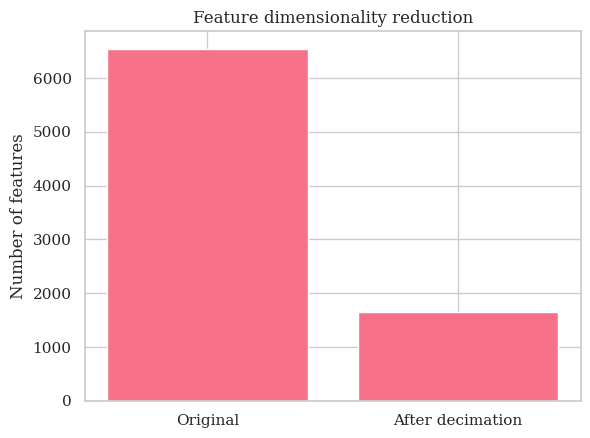

In [39]:
import matplotlib.pyplot as plt

original_dim = X_train.shape[1] * X_train.shape[2]
reduced_dim = F_train.shape[1]

plt.figure()
plt.bar(["Original", "After decimation"], [original_dim, reduced_dim])
plt.ylabel("Number of features")
plt.title("Feature dimensionality reduction")
plt.show()


## PCA (optional)
- make sure you already flattened features

### Helper functions

**PCA grid and function to run PCA with any sklearn pipeline**

In [23]:
print("Training set shape:", F_train.shape)
print("Test set shape:", F_test.shape)

Training set shape: (15552, 824)
Test set shape: (1728, 824)


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import FunctionTransformer

# Pick a grid that makes sense for feature size
#pca_grid = [350, 400, 450, 500, 550]
pca_grid = [10, 20, 30, 40, 50, 60, 75, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]

to_float64 = FunctionTransformer(lambda X: np.asarray(X, dtype=np.float64), validate=False)

def cv_sweep_pca_components_sklearn(
    estimator_pipeline,
    F_train,
    y_train,
    groups,
    cv,
    pca_grid,
):
    n_features = F_train.shape[1]
    mean_results = {}
    fold_results = {}

    for k in pca_grid:
        if not isinstance(k, int):
            continue
        if k <= 0:
            continue
        if k > n_features:
            continue

        fold_scores = []

        for train_idx, val_idx in cv.split(F_train, y_train, groups=groups):
            Xtr, Xva = F_train[train_idx], F_train[val_idx]
            ytr, yva = y_train[train_idx], y_train[val_idx]

            # make k fold-safe
            k_eff = min(k, Xtr.shape[0], Xtr.shape[1])
            if k_eff < 1:
                continue

            pipe = Pipeline([
                ("to_float64", to_float64),
                ("scaler", StandardScaler()),
                ("pca", PCA(n_components=k_eff, random_state=0)),
                ("clf", estimator_pipeline),
            ])

            pipe.fit(Xtr, ytr)
            yhat = pipe.predict(Xva)
            fold_scores.append(balanced_accuracy_score(yva, yhat))

        if len(fold_scores) == 0:
            continue

        fold_results[k] = fold_scores
        mean_results[k] = float(np.mean(fold_scores))

    best_k = max(mean_results, key=mean_results.get)
    return best_k, mean_results[best_k], mean_results, fold_results


**Fit on full training set and test on test set**

In [37]:
def fit_eval_on_test_sklearn(
    clf,
    F_train, y_train,
    F_test, y_test,
    n_components,
    normalize_cm=True,
    return_report_dict=True,
    return_decision_scores=False,
):
    # fold-safe / data-safe cap for PCA
    n_components_eff = int(min(n_components, F_train.shape[0], F_train.shape[1]))

    pipe = Pipeline([
        ("to_float64", to_float64),
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=n_components_eff, random_state=0)),
        ("clf", clf),
    ])

    pipe.fit(F_train, y_train)
    y_pred = pipe.predict(F_test)

    bacc = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    if normalize_cm:
        with np.errstate(divide="ignore", invalid="ignore"):
            cm_norm = cm / cm.sum(axis=1, keepdims=True)
            cm_norm = np.nan_to_num(cm_norm)
    else:
        cm_norm = None

    report_str = classification_report(y_test, y_pred, digits=3)
    report_dict = (
        classification_report(y_test, y_pred, digits=3, output_dict=True)
        if return_report_dict else None
    )

    out = {
        "bacc": float(bacc),
        "cm": cm,
        "cm_norm": cm_norm,
        "report": report_str,
        "report_dict": report_dict,
        "pipe": pipe,
        "y_pred": y_pred,
        "n_components_eff": n_components_eff,
    }

    if return_decision_scores:
        # works for LinearSVC and also for LDA (has decision_function)
        out["decision_scores"] = pipe.decision_function(F_test)

    return out


### SVM

In [32]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=1.0, max_iter=2500)

best_k_svm, best_bacc_svm, svm_results, svm_fold_results = (
    cv_sweep_pca_components_sklearn(
        estimator_pipeline=svm_clf,
        F_train=F_train,
        y_train=y_train,
        groups=groups,
        cv=cv,
        pca_grid=pca_grid,
    )
)

print("SVM best n_components:", best_k_svm)
print("SVM best mean CV balanced accuracy:", best_bacc_svm)

print("\nPer-fold balanced accuracy for best n_components:")
for i, score in enumerate(svm_fold_results[best_k_svm], start=1):
    print(f"  Fold {i}: {score:.4f}")

print("\nSVM CV results per n_components (mean ± std bACC):")
for k in sorted(svm_fold_results):
    scores = np.array(svm_fold_results[k])
    print(f"  k={k:4d} | mean={scores.mean():.4f} | std={scores.std():.4f}")

SVM best n_components: 450
SVM best mean CV balanced accuracy: 0.7247299382716049

Per-fold balanced accuracy for best n_components:
  Fold 1: 0.6094
  Fold 2: 0.7622
  Fold 3: 0.7854
  Fold 4: 0.8028
  Fold 5: 0.7969
  Fold 6: 0.6295
  Fold 7: 0.5788
  Fold 8: 0.7333
  Fold 9: 0.8243

SVM CV results per n_components (mean ± std bACC):
  k=  10 | mean=0.5085 | std=0.0133
  k=  20 | mean=0.5137 | std=0.0246
  k=  30 | mean=0.5240 | std=0.0350
  k=  40 | mean=0.5339 | std=0.0327
  k=  50 | mean=0.5528 | std=0.0383
  k=  60 | mean=0.5538 | std=0.0393
  k=  75 | mean=0.5573 | std=0.0394
  k= 100 | mean=0.5792 | std=0.0475
  k= 150 | mean=0.6586 | std=0.0811
  k= 200 | mean=0.6682 | std=0.0806
  k= 250 | mean=0.6894 | std=0.0782
  k= 300 | mean=0.6997 | std=0.0786
  k= 350 | mean=0.7113 | std=0.0857
  k= 400 | mean=0.7130 | std=0.0852
  k= 450 | mean=0.7247 | std=0.0882
  k= 500 | mean=0.7207 | std=0.0856
  k= 550 | mean=0.7204 | std=0.0841


**Fit and test**

In [38]:
svm_test = fit_eval_on_test_sklearn(
    clf=svm_clf,
    F_train=F_train, y_train=y_train,
    F_test=F_test, y_test=y_test,
    n_components=best_k_svm,
)

print("SVM test balanced accuracy:", svm_test["bacc"])
print("SVM confusion matrix:\n", svm_test["cm"])
print("SVM normalized confusion matrix:\n", svm_test["cm_norm"])
print("\nSVM report:\n", svm_test["report"])

SVM test balanced accuracy: 0.7607638888888888
SVM confusion matrix:
 [[1406   34]
 [ 131  157]]
SVM normalized confusion matrix:
 [[0.97638889 0.02361111]
 [0.45486111 0.54513889]]

SVM report:
               precision    recall  f1-score   support

           0      0.915     0.976     0.945      1440
           1      0.822     0.545     0.656       288

    accuracy                          0.905      1728
   macro avg      0.868     0.761     0.800      1728
weighted avg      0.899     0.905     0.896      1728



### LDA

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_clf = LDA()

best_k_lda, best_bacc_lda, lda_results, lda_fold_results = cv_sweep_pca_components_sklearn(
    estimator_pipeline=lda_clf,
    F_train=F_train,
    y_train=y_train,
    groups=groups,
    cv=cv,
    pca_grid=pca_grid,
)

print("LDA best n_components:", best_k_lda)
print("LDA best mean CV balanced accuracy:", best_bacc_lda)

print("\nPer-fold balanced accuracy for best n_components:")
for i, score in enumerate(lda_fold_results[best_k_lda], start=1):
    print(f"  Fold {i}: {score:.4f}")

print("\nLDA CV results per n_components (mean ± std bACC):")
for k in sorted(lda_fold_results):
    scores = np.asarray(lda_fold_results[k])
    print(f"  k={k:4d} | mean={scores.mean():.4f} | std={scores.std():.4f}")



LDA best n_components: 500
LDA best mean CV balanced accuracy: 0.7200231481481482

Per-fold balanced accuracy for best n_components:
  Fold 1: 0.6212
  Fold 2: 0.7486
  Fold 3: 0.7844
  Fold 4: 0.7847
  Fold 5: 0.8243
  Fold 6: 0.6090
  Fold 7: 0.5729
  Fold 8: 0.7420
  Fold 9: 0.7931

LDA CV results per n_components (mean ± std bACC):
  k=  10 | mean=0.5246 | std=0.0346
  k=  20 | mean=0.5309 | std=0.0393
  k=  30 | mean=0.5426 | std=0.0423
  k=  40 | mean=0.5558 | std=0.0404
  k=  50 | mean=0.5743 | std=0.0456
  k=  60 | mean=0.5775 | std=0.0457
  k=  75 | mean=0.5783 | std=0.0459
  k= 100 | mean=0.6002 | std=0.0542
  k= 150 | mean=0.6680 | std=0.0794
  k= 200 | mean=0.6750 | std=0.0824
  k= 250 | mean=0.6890 | std=0.0784
  k= 300 | mean=0.6983 | std=0.0803
  k= 350 | mean=0.7118 | std=0.0868
  k= 400 | mean=0.7132 | std=0.0839
  k= 450 | mean=0.7198 | std=0.0877
  k= 500 | mean=0.7200 | std=0.0879
  k= 550 | mean=0.7171 | std=0.0865


**Fit and test**

In [33]:
lda_test = fit_eval_on_test_sklearn(
    clf=lda_clf,
    F_train=F_train, y_train=y_train,
    F_test=F_test, y_test=y_test,
    n_components=best_k_lda,
)

print("LDA test balanced accuracy:", lda_test["bacc"])
print("LDA confusion matrix:\n", lda_test["cm"])
print("LDA normalized confusion matrix:\n", lda_test["cm_norm"])
print("\nLDA report:\n", lda_test["report"])

LDA test balanced accuracy: 0.7434027777777777
LDA confusion matrix:
 [[1411   29]
 [ 142  146]]
LDA normalized confusion matrix:
 [[0.97986111 0.02013889]
 [0.49305556 0.50694444]]

LDA report:
               precision    recall  f1-score   support

           0      0.909     0.980     0.943      1440
           1      0.834     0.507     0.631       288

    accuracy                          0.901      1728
   macro avg      0.871     0.743     0.787      1728
weighted avg      0.896     0.901     0.891      1728



### sLDA

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

slda_clf = LDA(solver="lsqr", shrinkage="auto")

best_k_slda, best_bacc_slda, slda_results, slda_fold_results = cv_sweep_pca_components_sklearn(
    estimator_pipeline=slda_clf,
    F_train=F_train,
    y_train=y_train,
    groups=groups,
    cv=cv,
    pca_grid=pca_grid,
)

print("sLDA best n_components:", best_k_slda)
print("sLDA best mean CV balanced accuracy:", best_bacc_slda)

print("\nPer-fold balanced accuracy for best n_components:")
for i, score in enumerate(slda_fold_results[best_k_slda], start=1):
    print(f"  Fold {i}: {score:.4f}")

print("\nsLDA CV results per n_components (mean ± std bACC):")
for k in sorted(slda_fold_results):
    scores = np.asarray(slda_fold_results[k])
    print(f"  k={k:4d} | mean={scores.mean():.4f} | std={scores.std():.4f}")


sLDA best n_components: 450
sLDA best mean CV balanced accuracy: 0.6577160493827161

Per-fold balanced accuracy for best n_components:
  Fold 1: 0.5646
  Fold 2: 0.6420
  Fold 3: 0.7635
  Fold 4: 0.7372
  Fold 5: 0.7448
  Fold 6: 0.5573
  Fold 7: 0.5358
  Fold 8: 0.6705
  Fold 9: 0.7038

sLDA CV results per n_components (mean ± std bACC):
  k=  10 | mean=0.5238 | std=0.0346
  k=  20 | mean=0.5269 | std=0.0381
  k=  30 | mean=0.5342 | std=0.0414
  k=  40 | mean=0.5427 | std=0.0355
  k=  50 | mean=0.5589 | std=0.0411
  k=  60 | mean=0.5587 | std=0.0426
  k=  75 | mean=0.5622 | std=0.0428
  k= 100 | mean=0.5750 | std=0.0472
  k= 150 | mean=0.6233 | std=0.0748
  k= 200 | mean=0.6266 | std=0.0753
  k= 250 | mean=0.6337 | std=0.0762
  k= 300 | mean=0.6436 | std=0.0829
  k= 350 | mean=0.6460 | std=0.0822
  k= 400 | mean=0.6513 | std=0.0840
  k= 450 | mean=0.6577 | std=0.0825
  k= 500 | mean=0.6573 | std=0.0838
  k= 550 | mean=0.6552 | std=0.0837


**Fit and test**

In [27]:
slda_test = fit_eval_on_test_sklearn(
    clf=slda_clf,
    F_train=F_train, y_train=y_train,
    F_test=F_test, y_test=y_test,
    n_components=best_k_slda,
)

print("sLDA test balanced accuracy:", slda_test["bacc"])
print("sLDA confusion matrix:\n", slda_test["cm"])
print("sLDA normalized confusion matrix:\n", slda_test["cm_norm"])
print("\nsLDA report:\n", slda_test["report"])


sLDA test balanced accuracy: 0.6569444444444444
sLDA confusion matrix:
 [[1432    8]
 [ 196   92]]
sLDA normalized confusion matrix:
 [[0.99444444 0.00555556]
 [0.68055556 0.31944444]]

sLDA report:
               precision    recall  f1-score   support

           0      0.880     0.994     0.934      1440
           1      0.920     0.319     0.474       288

    accuracy                          0.882      1728
   macro avg      0.900     0.657     0.704      1728
weighted avg      0.886     0.882     0.857      1728



**Results**
- decim=4
    - k=300
    - CV bacc: 0.6619791666666667
    - test bacc: 0.7364583333333333

### SWLDA

**Stepwise**

In [ ]:
import statsmodels.api as sm

def fit_swlda_stepwise(
    X: np.ndarray,  # (n_samples, n_features)
    y: np.ndarray,  # (n_samples,) 0/1
    p_enter: float = 0.10,
    p_remove: float = 0.15,
    max_features: int = 60,
    preselect_k: int = None,       
    verbose: bool = False,
):
    y = y.astype(float)

    n_samples, n_features = X.shape

    # preselection to reduce runtime/noise
    if preselect_k is not None and preselect_k < n_features:
        # simple, fold-safe univariate ranking: absolute correlation with y
        # (fast + works fine for preselection)
        eps = 1e-12
        y0 = y - y.mean()
        X0 = X - X.mean(axis=0, keepdims=True)
        denom = (np.sqrt((X0**2).sum(axis=0)) * np.sqrt((y0**2).sum()) + eps)
        corr = (X0.T @ y0) / denom
        keep = np.argsort(np.abs(corr))[-int(preselect_k):]
        keep = np.sort(keep)

        X_work = X[:, keep]
        feat_map = keep  # maps working indices -> original feature indices
        n_features_work = X_work.shape[1]
    else:
        X_work = X
        feat_map = None
        n_features_work = n_features

    selected = []  # indices in X_work
    changed = True

    while changed and (len(selected) < max_features):
        changed = False

        # FORWARD STEP
        remaining = [j for j in range(n_features_work) if j not in selected]
        best_p = None
        best_feature = None

        for j in remaining:
            candidate = selected + [j]
            X_cand = sm.add_constant(X_work[:, candidate], has_constant="add")
            model = sm.OLS(y, X_cand).fit()
            pval_j = float(model.pvalues[-1])

            if best_p is None or pval_j < best_p:
                best_p = pval_j
                best_feature = j

        if best_feature is not None and best_p is not None and best_p < p_enter:
            selected.append(best_feature)
            changed = True
            if verbose:
                print(f"[Forward] Added feature {best_feature} (p={best_p:.3g}). Total: {len(selected)}")

        # BACKWARD STEP
        if len(selected) > 0:
            X_sel = sm.add_constant(X_work[:, selected], has_constant="add")
            model = sm.OLS(y, X_sel).fit()

            # remove only the worst offender
            pvals = np.asarray(model.pvalues[1:], dtype=float)
            worst_idx = int(np.argmax(pvals))
            worst_p = float(pvals[worst_idx])

            if worst_p > p_remove:
                worst_feature = selected[worst_idx]
                selected.remove(worst_feature)
                changed = True
                if verbose:
                    print(f"[Backward] Removed feature {worst_feature} (p={worst_p:.3g}). Total: {len(selected)}")

    # Final model on selected features (in X_work space)
    if len(selected) == 0:
        X_final = sm.add_constant(np.zeros((n_samples, 0)), has_constant="add")
    else:
        X_final = sm.add_constant(X_work[:, selected], has_constant="add")

    final_model = sm.OLS(y, X_final).fit()

    # ap selected indices back to original feature indices
    if feat_map is not None:
        selected_orig = feat_map[np.array(selected, dtype=int)].tolist()
    else:
        selected_orig = selected

    return selected_orig, final_model

**PCA CV**

In [73]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

# PCA search grid (adjust upper bound if needed)
pca_grid = [10, 20, 30, 40, 50, 60, 75, 100, 150, 200, 250, 300, 350, 400, 450, 500]

def swlda_predict(model, X, selected, threshold):
    if len(selected) == 0:
        Xc = sm.add_constant(np.zeros((X.shape[0], 0)), has_constant="add")
    else:
        Xc = sm.add_constant(X[:, selected], has_constant="add")

    y_score = model.predict(Xc)
    return (y_score >= threshold).astype(int), y_score

In [ ]:
threshold = 0.30203117248992656  # from prior tuning

SWLDA_PCA_LOG = []

def cv_sweep_pca_components_swlda(
    F,
    y,
    groups,
    cv,
    pca_grid,
    p_enter=0.10051356980829242,
    p_remove=0.12707564728499368,
    max_features=59,
    preselect_k=150,
):
    n_features = F.shape[1]
    results = {}

    for k in pca_grid:
        if k > n_features:
            continue

        fold_scores = []

        for tr_idx, va_idx in cv.split(F, y, groups):
            Xtr, Xva = F[tr_idx], F[va_idx]
            ytr, yva = y[tr_idx], y[va_idx]

            # Fit preprocessing on TRAIN only
            scaler = StandardScaler()
            pca = PCA(n_components=k, random_state=0)

            Xtr_pca = pca.fit_transform(scaler.fit_transform(Xtr))
            Xva_pca = pca.transform(scaler.transform(Xva))

            selected, model = fit_swlda_stepwise(
                Xtr_pca,
                ytr,
                p_enter=p_enter,
                p_remove=p_remove,
                max_features=max_features,
                preselect_k=preselect_k,
                verbose=False,
            )

            yhat, _ = swlda_predict(model, Xva_pca, selected, threshold)
            fold_scores.append(balanced_accuracy_score(yva, yhat))
        

        results[k] = {
            "mean": mean_bacc,
            "std": std_bacc,
            "fold_scores": fold_scores.copy(),
        }
        print(f"PCA k={k:4d} | CV bACC={mean_bacc:.3f} ± {std_bacc:.3f}")

        SWLDA_PCA_LOG.append({
            "k": int(k),
            "p_enter": float(p_enter),
            "p_remove": float(p_remove),    
            "max_features": int(max_features),
            "preselect_k": (None if preselect_k is None else int(preselect_k)),
            "threshold": float(threshold),
            "fold_scores": fold_scores.copy(),
            "mean_bacc": float(np.mean(fold_scores)),
            "std_bacc": float(np.std(fold_scores)),
        })


    best_k_swlda = max(results, key=lambda kk: results[kk]["mean"])
    return best_k_swlda, results[best_k_swlda]["mean"], results


In [ ]:
best_k_swlda, best_cv_score_swlda, pca_results = cv_sweep_pca_components_swlda(
    F=F_train,
    y=y_train,
    groups=groups,
    cv=cv,
    pca_grid=pca_grid,
    p_enter=0.10051356980829242,
    p_remove=0.12707564728499368,
    max_features=59,
    preselect_k=150,
)

print("Best PCA components:", best_k_swlda)
print(
    f"Best CV balanced accuracy: "
    f"{pca_results[best_k_swlda]['mean']:.3f} ± "
    f"{pca_results[best_k_swlda]['std']:.3f}"
)



PCA k=  10 | CV bACC=0.666
PCA k=  20 | CV bACC=0.677
PCA k=  30 | CV bACC=0.674
PCA k=  40 | CV bACC=0.664
PCA k=  50 | CV bACC=0.660
PCA k=  60 | CV bACC=0.662
PCA k=  75 | CV bACC=0.683
PCA k= 100 | CV bACC=0.691
PCA k= 150 | CV bACC=0.690
PCA k= 200 | CV bACC=0.733
PCA k= 250 | CV bACC=0.722
PCA k= 300 | CV bACC=0.723
PCA k= 350 | CV bACC=0.723
PCA k= 400 | CV bACC=0.732
PCA k= 450 | CV bACC=0.711
PCA k= 500 | CV bACC=0.715
Best PCA components: 200
Best CV balanced accuracy: 0.7333333333333334


In [ ]:
import pandas as pd

df = pd.DataFrame(SWLDA_PCA_LOG)

# sort by best mean score
df_sorted = df.sort_values("mean_bacc", ascending=False)

df_sorted.head()

df_sorted.iloc[0]["fold_scores"]

df_sorted[["mean_bacc", "std_bacc"]].describe()

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["std_bacc"], df["mean_bacc"])
plt.xlabel("Std CV Balanced Accuracy")
plt.ylabel("Mean CV Balanced Accuracy")
plt.show()

**Fit and test**

In [ ]:
scaler = StandardScaler()
pca = PCA(n_components=best_k_swlda, random_state=0)

Ftr_pca = pca.fit_transform(scaler.fit_transform(F_train))
Fte_pca = pca.transform(scaler.transform(F_test))

selected, final_model = fit_swlda_stepwise(
    Ftr_pca,
    y_train,
    p_enter=0.10051356980829242,
    p_remove=0.12707564728499368,
    max_features=59,
    preselect_k=150,
    verbose=False,
)

y_pred, y_score = swlda_predict(final_model, Fte_pca, selected, threshold)

bacc_swlda = balanced_accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1, keepdims=True)

[Forward] Added feature 5 (p=1.84e-16). Total: 1
[Forward] Added feature 3 (p=8.57e-10). Total: 2
[Forward] Added feature 0 (p=9.9e-09). Total: 3
[Forward] Added feature 6 (p=1.09e-08). Total: 4
[Forward] Added feature 7 (p=2.95e-08). Total: 5
[Forward] Added feature 147 (p=2.94e-05). Total: 6
[Forward] Added feature 46 (p=2.91e-05). Total: 7
[Forward] Added feature 44 (p=0.000355). Total: 8
[Forward] Added feature 177 (p=0.000344). Total: 9
[Forward] Added feature 158 (p=0.000465). Total: 10
[Forward] Added feature 160 (p=0.000506). Total: 11
[Forward] Added feature 99 (p=0.000674). Total: 12
[Forward] Added feature 85 (p=0.000739). Total: 13
[Forward] Added feature 135 (p=0.00071). Total: 14
[Forward] Added feature 153 (p=0.00103). Total: 15
[Forward] Added feature 94 (p=0.0012). Total: 16
[Forward] Added feature 196 (p=0.00116). Total: 17
[Forward] Added feature 12 (p=0.00118). Total: 18
[Forward] Added feature 88 (p=0.00135). Total: 19
[Forward] Added feature 183 (p=0.00157). Total

In [77]:
print("Test balanced accuracy:", bacc_swlda)
print("Confusion matrix:\n", cm)
print("Normalized confusion matrix:\n", cm_norm)
print("\nClassification report:\n")
print(classification_report(y_test, y_pred, digits=3))

Test balanced accuracy: 0.7489583333333334
Confusion matrix:
 [[394  86]
 [ 31  65]]
Normalized confusion matrix:
 [[0.82083333 0.17916667]
 [0.32291667 0.67708333]]

Classification report:

              precision    recall  f1-score   support

           0      0.927     0.821     0.871       480
           1      0.430     0.677     0.526        96

    accuracy                          0.797       576
   macro avg      0.679     0.749     0.699       576
weighted avg      0.844     0.797     0.813       576



**Results**
- decim=4
    - k=200
    - CV bacc: 0.7333333333333334
    - test bacc: 0.7489583333333334

### Comparison

**CV balanced accuracy**

In [78]:
summary = {
    "SVM": (best_k_svm, best_bacc_svm),
    "LDA": (best_k_lda, best_bacc_lda),
    "sLDA": (best_k_slda, best_bacc_slda),
    "SWLDA": (best_k_swlda, best_cv_score_swlda),
}
summary


{'SVM': (550, 0.7468750000000001),
 'LDA': (350, 0.7348958333333333),
 'sLDA': (300, 0.6619791666666667),
 'SWLDA': (200, 0.7333333333333334)}

**Test balanced accuracy**

In [79]:
test_summary = {
    "SVM":  {"best_k": best_k_svm,  "test_bacc": svm_test["bacc"]},
    "LDA":  {"best_k": best_k_lda,  "test_bacc": lda_test["bacc"]},
    "sLDA": {"best_k": best_k_slda, "test_bacc": slda_test["bacc"]},
    "SWLDA":{"best_k": best_k_swlda,  "test_bacc": bacc_swlda},
}
test_summary

{'SVM': {'best_k': 550, 'test_bacc': 0.7989583333333333},
 'LDA': {'best_k': 350, 'test_bacc': 0.7989583333333333},
 'sLDA': {'best_k': 300, 'test_bacc': 0.7364583333333333},
 'SWLDA': {'best_k': 200, 'test_bacc': 0.7489583333333334}}

## SVM

### Create SVM pipeline

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(
        kernel="linear",
        class_weight="balanced",   # important for imbalanced P300
        probability=False
    )),
])

### CV scores

In [52]:
scores = cross_val_score(
    svm_clf,
    F_train,
    y_train,
    cv=cv,
    groups=groups,
    scoring="balanced_accuracy"
)

print("Session-based CV balanced accuracy per fold:", scores)
print("Mean CV balanced accuracy:", float(np.mean(scores)))

Session-based CV balanced accuracy per fold: [0.69791667 0.81284722 0.77708333 0.81145833 0.85972222 0.72847222
 0.71875    0.75451389 0.85694444]
Mean CV balanced accuracy: 0.7797453703703704


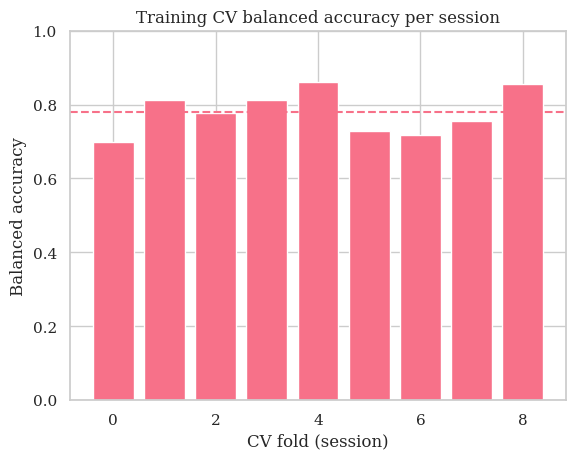

In [53]:
# scores from previous CV cell
cv_scores = scores  

plt.figure()
plt.bar(np.arange(len(cv_scores)), cv_scores)
plt.axhline(np.mean(cv_scores), linestyle="--")
plt.xlabel("CV fold (session)")
plt.ylabel("Balanced accuracy")
plt.title("Training CV balanced accuracy per session")
plt.ylim(0.0, 1.0)
plt.show()


### Train of full train set and evaluate on held-out test set

In [54]:
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    confusion_matrix,
    classification_report
)

svm_clf.fit(F_train, y_train)

y_pred = svm_clf.predict(F_test)

print("Test accuracy:", float(accuracy_score(y_test, y_pred)))
print("Test balanced accuracy:", float(balanced_accuracy_score(y_test, y_pred)))

print("\nConfusion matrix [rows=true, cols=pred]:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=3))


Test accuracy: 0.8819444444444444
Test balanced accuracy: 0.8666666666666667

Confusion matrix [rows=true, cols=pred]:
 [[1281  159]
 [  45  243]]

Classification report:
               precision    recall  f1-score   support

           0      0.966     0.890     0.926      1440
           1      0.604     0.844     0.704       288

    accuracy                          0.882      1728
   macro avg      0.785     0.867     0.815      1728
weighted avg      0.906     0.882     0.889      1728



### Test ROC AUC

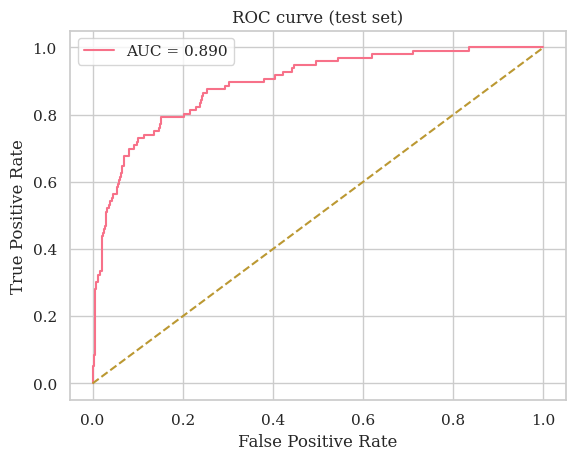

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

decision_scores = svm_clf.decision_function(F_test)

fpr, tpr, thresholds = roc_curve(y_test, decision_scores)
auc = roc_auc_score(y_test, decision_scores)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve (test set)")
plt.legend()
plt.show()

### Confusion matrix (test)

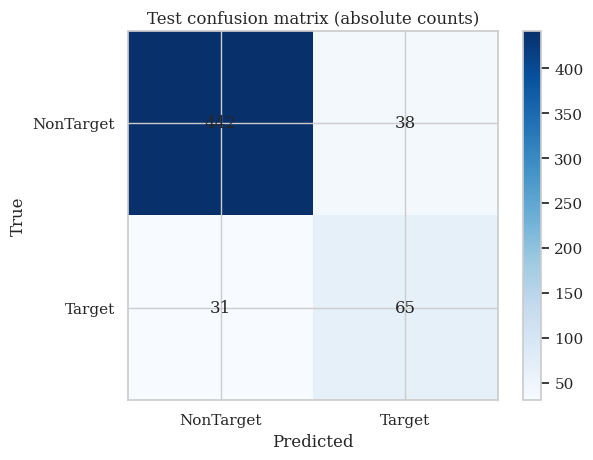

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm, cmap="Blues")
plt.colorbar()
plt.xticks([0, 1], ["NonTarget", "Target"])
plt.yticks([0, 1], ["NonTarget", "Target"])
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.title("Test confusion matrix (absolute counts)")
plt.show()


### Normalised confusion matrix

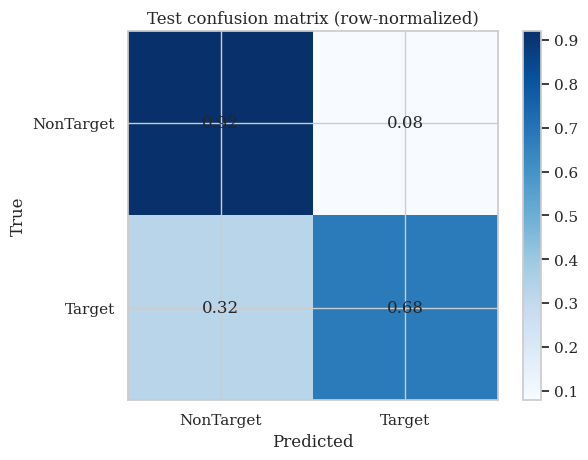

In [38]:
cm_norm = cm / cm.sum(axis=1, keepdims=True)

plt.figure()
plt.imshow(cm_norm, cmap="Blues")
plt.colorbar()
plt.xticks([0, 1], ["NonTarget", "Target"])
plt.yticks([0, 1], ["NonTarget", "Target"])
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{cm_norm[i, j]:.2f}", ha="center", va="center")

plt.title("Test confusion matrix (row-normalized)")
plt.show()


### Decision score distributions

- This shows how well P300 signals separate from noise.
- Overlap -> classifier struggles.
- CLear shift -> strong detection.

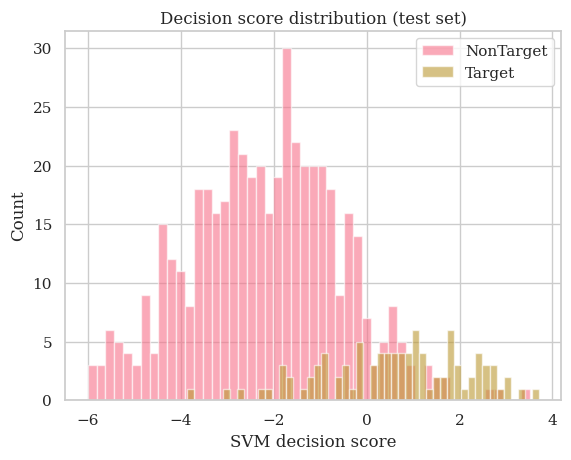

In [44]:
scores_target = decision_scores[y_test == 1]
scores_nontarget = decision_scores[y_test == 0]

plt.figure()
plt.hist(scores_nontarget, bins=50, alpha=0.6, label="NonTarget")
plt.hist(scores_target, bins=50, alpha=0.6, label="Target")
plt.xlabel("SVM decision score")
plt.ylabel("Count")
plt.title("Decision score distribution (test set)")
plt.legend()
plt.show()


## LDA

Uses the same data and groups created in the first part of the tutorial.

### LDA pipeline

Defaults:
```python
LinearDiscriminantAnalysis(
    solver="svd",
    shrinkage=None,
    priors=None,
    n_components=None,
    store_covariance=False,
    tol=1e-4
)



In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("lda", LinearDiscriminantAnalysis()),
])

### Cross validation

In [15]:
from sklearn.model_selection import cross_val_score

lda_cv_scores = cross_val_score(
    lda_clf,
    F_train,
    y_train,
    cv=cv,
    groups=groups,
    scoring="balanced_accuracy",
)

print("LDA session-based CV balanced accuracy per fold:", lda_cv_scores)
print("Mean CV balanced accuracy:", float(np.mean(lda_cv_scores)))

LDA session-based CV balanced accuracy per fold: [0.62361111 0.74270833 0.78680556 0.79479167 0.82881944 0.59618056
 0.59236111 0.72291667 0.80520833]
Mean CV balanced accuracy: 0.7214891975308642


### Fit LDA on full training set and evaluate on held-out test set

In [16]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report

lda_clf.fit(F_train, y_train)
y_pred_lda = lda_clf.predict(F_test)

print("Test accuracy:", float(accuracy_score(y_test, y_pred_lda)))
print("Test balanced accuracy:", float(balanced_accuracy_score(y_test, y_pred_lda)))

print("\nClassification report:\n", classification_report(y_test, y_pred_lda, digits=3))


Test accuracy: 0.90625
Test balanced accuracy: 0.7576388888888889

Classification report:
               precision    recall  f1-score   support

           0      0.913     0.981     0.946      1440
           1      0.846     0.535     0.655       288

    accuracy                          0.906      1728
   macro avg      0.880     0.758     0.801      1728
weighted avg      0.902     0.906     0.897      1728



### ROC curve for LDA

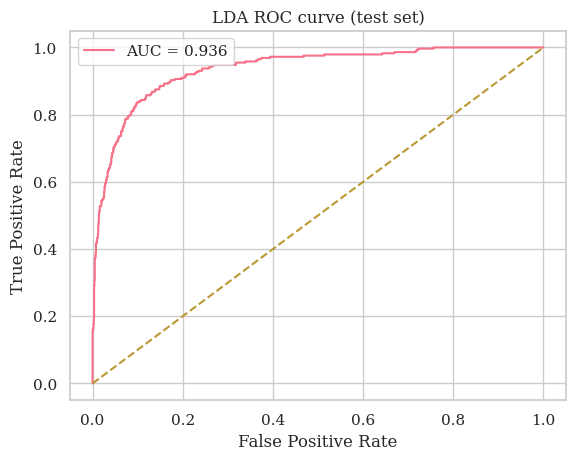

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

proba = lda_clf.predict_proba(F_test)[:, 1]  # probability of class 1 (Target)

fpr, tpr, thresholds = roc_curve(y_test, proba)
auc = roc_auc_score(y_test, proba)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LDA ROC curve (test set)")
plt.legend()
plt.show()


### Confusion matrix (absolute and normalised)

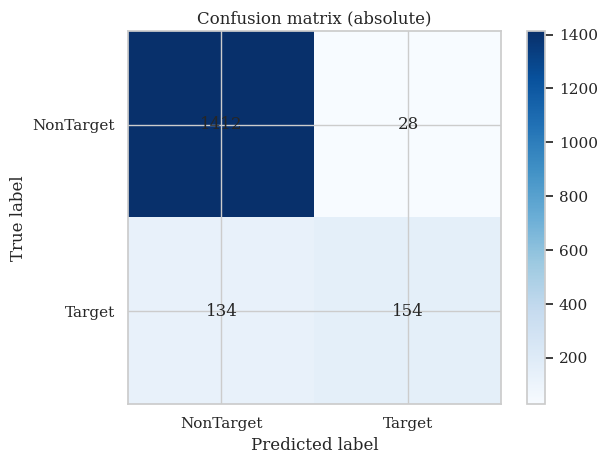

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lda)

plt.figure()
plt.imshow(cm, cmap="Blues")
plt.colorbar()
plt.xticks([0, 1], ["NonTarget", "Target"])
plt.yticks([0, 1], ["NonTarget", "Target"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix (absolute)")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()


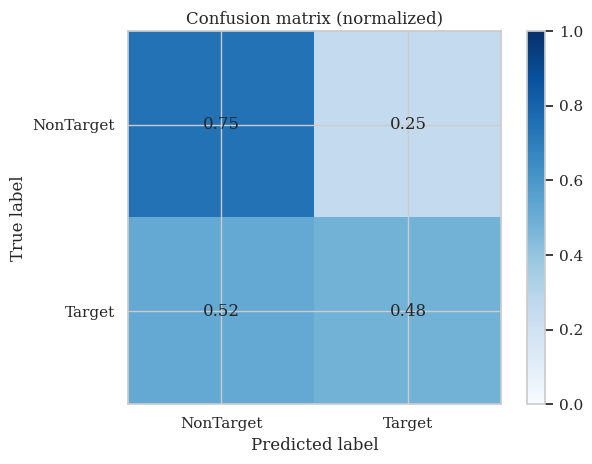

In [52]:
cm_norm = cm / cm.sum(axis=1, keepdims=True)

plt.figure()
plt.imshow(cm_norm, cmap="Blues", vmin=0, vmax=1)
plt.colorbar()
plt.xticks([0, 1], ["NonTarget", "Target"])
plt.yticks([0, 1], ["NonTarget", "Target"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix (normalized)")

for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{cm_norm[i, j]:.2f}", ha="center", va="center")

plt.tight_layout()
plt.show()


### Discriminant scores for target vs non-target

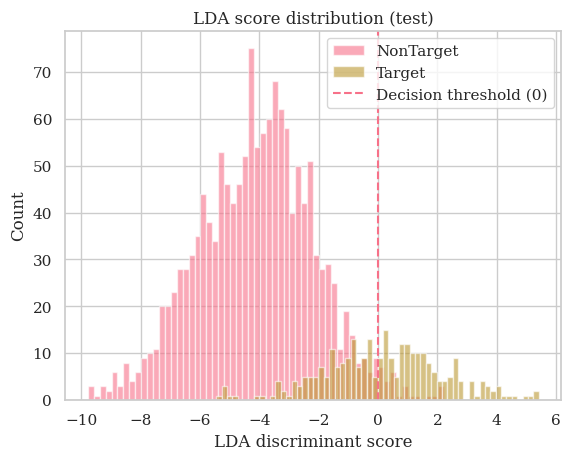

Wrong predictions on test: 162 / 1728


In [19]:
lda_scores = lda_clf.decision_function(F_test)  # 1D scores
y_pred_full = lda_clf.predict(F_test)
wrong = (y_pred_full != y_test)

plt.figure()
plt.hist(lda_scores[y_test == 0], bins=60, alpha=0.6, label="NonTarget")
plt.hist(lda_scores[y_test == 1], bins=60, alpha=0.6, label="Target")
plt.axvline(0.0, linestyle="--", label="Decision threshold (0)")
plt.xlabel("LDA discriminant score")
plt.ylabel("Count")
plt.title("LDA score distribution (test)")
plt.legend()
plt.show()

print("Wrong predictions on test:", int(np.sum(wrong)), "/", len(y_test))


## sLDA

- Regular LDA estimates a full covariance matrix, which can be unstable for EEG because we often have high-dimensional features and relatively few trials.
- Shrinkage LDA (sLDA) adds regularization to the covariance estimate, which typically improves generalization and reduces overfitting in P300 pipelines.
 

### sLDA pipeline

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Shrinkage LDA: solver='lsqr' (or 'eigen') supports shrinkage
slda_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("slda", LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto")),
])


### Cross-validation 

In [21]:
from sklearn.model_selection import cross_val_score

slda_cv_scores = cross_val_score(
    slda_clf,
    F_train,
    y_train,
    cv=cv,
    groups=groups,
    scoring="balanced_accuracy",
)

print("sLDA session-based CV balanced accuracy per fold:", slda_cv_scores)
print("Mean CV balanced accuracy:", float(np.mean(slda_cv_scores)))


sLDA session-based CV balanced accuracy per fold: [0.62465278 0.74756944 0.78993056 0.78333333 0.82083333 0.60277778
 0.57708333 0.73333333 0.81215278]
Mean CV balanced accuracy: 0.7212962962962963


### Fit of training set and evaluate on held-out test set

In [22]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report

slda_clf.fit(F_train, y_train)
y_pred_slda = slda_clf.predict(F_test)

print("Test accuracy:", float(accuracy_score(y_test, y_pred_slda)))
print("Test balanced accuracy:", float(balanced_accuracy_score(y_test, y_pred_slda)))
print("\nClassification report:\n", classification_report(y_test, y_pred_slda, digits=3))


Test accuracy: 0.9027777777777778
Test balanced accuracy: 0.7486111111111111

Classification report:
               precision    recall  f1-score   support

           0      0.910     0.980     0.944      1440
           1      0.837     0.517     0.639       288

    accuracy                          0.903      1728
   macro avg      0.874     0.749     0.792      1728
weighted avg      0.898     0.903     0.893      1728



## SWLDA (without HPO)

### Stepwise selection

- LDA + statistical feature selection.
- Iterative forward/backward feature selection that keeps only statiscally significant features.
- persoms stepwise regression to automatically select a subset of features.
- It is more interpretable as you can see which channels and latencies matter.


Simple SWLDA-style stepwise linear model:
 - Forward: add the feature with the smallest p-value if p < p_enter
    - Looks at p-value of the candidate only (if it explains unique varaince)
- Backward: remove any included feature with p > p_remove
    - A feature can enter with a low p-value, but later become non-significant after other features are added.
    - Every iteration the worst one is removed.
    - In brief:
        - Forward step asks: "does this feature help given the current model?"
        - Backward step asks: "Does this feature still help after other features are in?"
- Stops when no changes happen or max_features reached


In [11]:
import numpy as np
import statsmodels.api as sm


def fit_swlda_stepwise(
    X: np.ndarray, # (n_samples, n_features) -> row = one trial, column = a feature
    y: np.ndarray, # (n_samples,) binary labels 0/1
    p_enter: float = 0.10, # if candidate is below this p-value, add it
    p_remove: float = 0.15, # if included feature is above this p-value, remove it
    max_features: int = 60, 
    verbose: bool = True, # prints what features are added/removed
):

    # Ensure y is float for regression (0/1)
    y = y.astype(float)

    n_samples, n_features = X.shape
    selected = []  # list of selected feature indices

    # A flag to control the loop. We keep iterating while features are being added/removed
    changed = True

    while changed and (len(selected) < max_features):
        changed = False

        # FORWARD STEP: try adding one new feature
        remaining = [j for j in range(n_features) if j not in selected] # builds a list of features not yet selected
        best_p = None
        best_feature = None

        # If we already have features, start from them; else start from intercept-only
        for j in remaining:
            candidate = selected + [j] # try adding feature j to model
            X_cand = sm.add_constant(X[:, candidate], has_constant="add")
            model = sm.OLS(y, X_cand).fit()

            # p-values: index 0 is intercept, then coefficients in candidate order
            pval_j = model.pvalues[-1]  # p-value of the newly added feature 

            if best_p is None or pval_j < best_p:
                best_p = pval_j
                best_feature = j

        if best_feature is not None and best_p is not None and best_p < p_enter:
            selected.append(best_feature)
            changed = True
            if verbose:
                print(f"[Forward] Added feature {best_feature} (p={best_p:.3g}). Total: {len(selected)}")

        # BACKARD STEP: remove any feature that became non-significant
        if len(selected) > 0:
            # build model with current selected features
            X_sel = sm.add_constant(X[:, selected], has_constant="add")
            model = sm.OLS(y, X_sel).fit()

            # pvalues: intercept is [0], features are [1:]
            pvals = model.pvalues[1:]
            # Find features whose p-value is too large
            to_remove = [selected[i] for i, pv in enumerate(pvals) if pv > p_remove]

            pvals = model.pvalues[1:]
            worst_idx = int(np.argmax(pvals))
            worst_p = float(pvals[worst_idx])

            # Remove worst (largest p-value) first for stability
            if worst_p > p_remove:
                worst_feature = selected[worst_idx]
                selected.remove(worst_feature)
                changed = True      

                if verbose:
                    print(f"[Backward] Removed feature {worst_feature} (p={worst_p:.3g}). Total: {len(selected)}")

    # Final model fit on selected features
    if len(selected) == 0:
        # Fall back to intercept-only model (not great, but avoids crashing)
        X_final = sm.add_constant(np.zeros((n_samples, 0)), has_constant="add")
    else:
        X_final = sm.add_constant(X[:, selected], has_constant="add")

    final_model = sm.OLS(y, X_final).fit()

    return selected, final_model


### Train SWLDA

From HPO of SWLDA:\ 
Best params:\
  p_enter: 0.10051356980829242\
  p_remove_offset: 0.12707564728499368\
  max_features: 59\
  threshold: 0.30203117248992656

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report

# 1) Scale features (important because stepwise selection + regression are sensitive to scale)
scaler = StandardScaler() # each feature to zero mean and unit variance (prevents features with large variance dominating)
F_train_z = scaler.fit_transform(F_train) # fit learns statistics from data and transform applies learned statistics
F_test_z = scaler.transform(F_test)

# 2) Fit SWLDA-style stepwise model on training data
selected_idx, swlda_model = fit_swlda_stepwise(
    F_train_z,
    y_train,
    p_enter=0.10051356980829242,      # typical-ish stepwise threshold
    p_remove=0.12707564728499368,     # slightly higher to prevent oscillation
    max_features=59,
    #threshold=0.30203117248992656,   # common in P300 SWLDA setups (often 30-60)
    verbose=True
)

print("\nSelected features:", len(selected_idx))
print("Model R^2 (train):", float(swlda_model.rsquared))


[Forward] Added feature 734 (p=1.83e-29). Total: 1
[Forward] Added feature 124 (p=4.85e-18). Total: 2
[Forward] Added feature 1466 (p=8.43e-12). Total: 3
[Forward] Added feature 354 (p=1.49e-10). Total: 4
[Forward] Added feature 1558 (p=1.48e-09). Total: 5
[Forward] Added feature 630 (p=5.54e-08). Total: 6
[Forward] Added feature 317 (p=2.54e-07). Total: 7
[Forward] Added feature 214 (p=2.34e-09). Total: 8
[Forward] Added feature 333 (p=8.43e-07). Total: 9
[Forward] Added feature 848 (p=1.33e-08). Total: 10
[Forward] Added feature 233 (p=1.31e-05). Total: 11
[Forward] Added feature 935 (p=4.77e-05). Total: 12
[Forward] Added feature 570 (p=7.54e-05). Total: 13
[Forward] Added feature 322 (p=0.000117). Total: 14
[Forward] Added feature 631 (p=5.89e-10). Total: 15
[Forward] Added feature 1508 (p=9.39e-05). Total: 16
[Forward] Added feature 1288 (p=9.74e-05). Total: 17
[Forward] Added feature 794 (p=1.77e-05). Total: 18
[Forward] Added feature 740 (p=0.000273). Total: 19
[Forward] Added f

### Predict on test set

In [16]:
# from HPO
threshold=0.30203117248992656

# Build the design matrices for prediction: intercept + selected features
if len(selected_idx) == 0:
    X_test_sel = sm.add_constant(np.zeros((F_test_z.shape[0], 0)), has_constant="add")
else:
    X_test_sel = sm.add_constant(F_test_z[:, selected_idx], has_constant="add")

# Regression outputs predicted y in [~0, ~1] (not guaranteed, but usually close)
y_score = swlda_model.predict(X_test_sel)

# Convert scores to hard labels using threshold 0.5
#y_pred = (y_score >= 0.5).astype(int)
y_pred = (y_score >= threshold).astype(int)

print("Test accuracy:", float(accuracy_score(y_test, y_pred)))
print("Test balanced accuracy:", float(balanced_accuracy_score(y_test, y_pred)))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=3))


Test accuracy: 0.8125
Test balanced accuracy: 0.8083333333333333

Classification report:
               precision    recall  f1-score   support

           0      0.954     0.815     0.879       480
           1      0.464     0.802     0.588        96

    accuracy                          0.812       576
   macro avg      0.709     0.808     0.733       576
weighted avg      0.872     0.812     0.830       576



### Plot score distributions

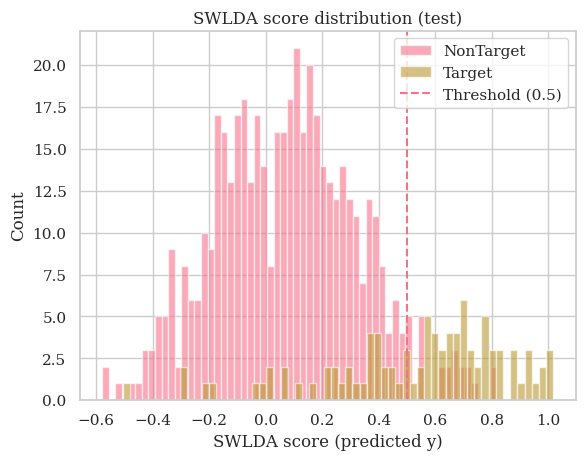

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(y_score[y_test == 0], bins=60, alpha=0.6, label="NonTarget")
plt.hist(y_score[y_test == 1], bins=60, alpha=0.6, label="Target")
plt.axvline(0.5, linestyle="--", label="Threshold (0.5)")
plt.xlabel("SWLDA score (predicted y)")
plt.ylabel("Count")
plt.title("SWLDA score distribution (test)")
plt.legend()
plt.show()


### Map of selected features

In [ ]:
# Map flattened feature indices back to (channel, time_index_in_downsampled_window)
n_ch = X_train.shape[1]
n_t_ds = X_train.shape[2] // decim  # because make_svm_features used ::decim

def idx_to_ch_t(idx, n_t_ds):
    ch = idx // n_t_ds
    t = idx % n_t_ds
    return ch, t

# Show top 15 features by absolute weight
# model params: [intercept, w1, w2, ...] aligned with selected_idx order
if len(selected_idx) > 0:
    coefs = swlda_model.params[1:]  # skip intercept
    order = np.argsort(np.abs(coefs))[::-1]

    print("Top features (by |weight|):")
    for k in order[:15]:
        feat_idx = selected_idx[k]
        ch, t = idx_to_ch_t(feat_idx, n_t_ds)
        print(f"  feature={feat_idx:6d} | ch={ch:3d} | t_ds={t:4d} | weight={coefs[k]:+.4f}")
else:
    print("No features were selected (intercept-only model). Try increasing max_features or loosening p_enter.")


Top features (by |weight|):
  feature=   230 | ch=  2 | t_ds=  26 | weight=+0.2893
  feature=  1054 | ch= 10 | t_ds=  34 | weight=+0.2691
  feature=  1466 | ch= 14 | t_ds=  38 | weight=-0.2181
  feature=   319 | ch=  3 | t_ds=  13 | weight=+0.2061
  feature=   734 | ch=  7 | t_ds=  20 | weight=-0.1826
  feature=    24 | ch=  0 | t_ds=  24 | weight=-0.1753
  feature=   322 | ch=  3 | t_ds=  16 | weight=+0.1577
  feature=   731 | ch=  7 | t_ds=  17 | weight=-0.1369
  feature=   317 | ch=  3 | t_ds=  11 | weight=+0.1321
  feature=  1558 | ch= 15 | t_ds=  28 | weight=+0.1229
  feature=   233 | ch=  2 | t_ds=  29 | weight=+0.1198
  feature=   333 | ch=  3 | t_ds=  27 | weight=-0.1166
  feature=   631 | ch=  6 | t_ds=  19 | weight=-0.1146
  feature=   628 | ch=  6 | t_ds=  16 | weight=-0.1019
  feature=   740 | ch=  7 | t_ds=  26 | weight=-0.0992


## SWLDA (with HPO)

Goal: Find SWLDA hyperparameters that maximize cross-validated balanced accuracy:
- p_enter: entry p-value threshold (smaller = stricter)
- p_remove: removal p-value threshold (usually >= p_enter)
- max_features: max number of selected features

We use GroupKFold to prevent session leakage.\
Important: Scaling + feature selection happen inside each fold.


### Stepwise selection

In [ ]:
import statsmodels.api as sm

def fit_swlda_stepwise(
    X: np.ndarray,  # (n_samples, n_features)
    y: np.ndarray,  # (n_samples,) 0/1
    p_enter: float = 0.10,
    p_remove: float = 0.15,
    max_features: int = 60,
    preselect_k: int = None,       
    verbose: bool = False,
):
    y = y.astype(float)

    n_samples, n_features = X.shape

    # preselection to reduce runtime/noise
    if preselect_k is not None and preselect_k < n_features:
        # simple, fold-safe univariate ranking: absolute correlation with y
        # (fast + works fine for preselection)
        eps = 1e-12
        y0 = y - y.mean()
        X0 = X - X.mean(axis=0, keepdims=True)
        denom = (np.sqrt((X0**2).sum(axis=0)) * np.sqrt((y0**2).sum()) + eps)
        corr = (X0.T @ y0) / denom
        keep = np.argsort(np.abs(corr))[-int(preselect_k):]
        keep = np.sort(keep)

        X_work = X[:, keep]
        feat_map = keep  # maps working indices -> original feature indices
        n_features_work = X_work.shape[1]
    else:
        X_work = X
        feat_map = None
        n_features_work = n_features

    selected = []  # indices in X_work
    changed = True

    while changed and (len(selected) < max_features):
        changed = False

        # FORWARD STEP
        remaining = [j for j in range(n_features_work) if j not in selected]
        best_p = None
        best_feature = None

        for j in remaining:
            candidate = selected + [j]
            X_cand = sm.add_constant(X_work[:, candidate], has_constant="add")
            model = sm.OLS(y, X_cand).fit()
            pval_j = float(model.pvalues[-1])

            if best_p is None or pval_j < best_p:
                best_p = pval_j
                best_feature = j

        if best_feature is not None and best_p is not None and best_p < p_enter:
            selected.append(best_feature)
            changed = True
            if verbose:
                print(f"[Forward] Added feature {best_feature} (p={best_p:.3g}). Total: {len(selected)}")

        # BACKWARD STEP
        if len(selected) > 0:
            X_sel = sm.add_constant(X_work[:, selected], has_constant="add")
            model = sm.OLS(y, X_sel).fit()

            # remove only the worst offender
            pvals = np.asarray(model.pvalues[1:], dtype=float)
            worst_idx = int(np.argmax(pvals))
            worst_p = float(pvals[worst_idx])

            if worst_p > p_remove:
                worst_feature = selected[worst_idx]
                selected.remove(worst_feature)
                changed = True
                if verbose:
                    print(f"[Backward] Removed feature {worst_feature} (p={worst_p:.3g}). Total: {len(selected)}")

    # Final model on selected features (in X_work space)
    if len(selected) == 0:
        X_final = sm.add_constant(np.zeros((n_samples, 0)), has_constant="add")
    else:
        X_final = sm.add_constant(X_work[:, selected], has_constant="add")

    final_model = sm.OLS(y, X_final).fit()

    # ap selected indices back to original feature indices
    if feat_map is not None:
        selected_orig = feat_map[np.array(selected, dtype=int)].tolist()
    else:
        selected_orig = selected

    return selected_orig, final_model

Cross-validated balanced accuracy for SWLDA with GroupKFold.

IMPORTANT anti-leakage rules:
1) scaling is fitted only on the train fold
2) stepwise selection is run only on the train fold
3) evaluation happens on the untouched validation fold


In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold

SWLDA_CV_LOG = []

def swlda_groupkfold_bacc(
    F: np.ndarray,
    y: np.ndarray,
    groups: np.ndarray,
    cv,
    p_enter: float,
    p_remove: float,
    max_features: int,
    threshold: float = 0.5,
    preselect_k: int = None,
) -> float:

    y = y.astype(int)

    fold_scores = []

    for fold_i, (tr_idx, va_idx) in enumerate(cv.split(F, y, groups)):
        F_tr, F_va = F[tr_idx], F[va_idx]
        y_tr, y_va = y[tr_idx], y[va_idx]

        # Scale using train fold only (prevents leakage)
        scaler = StandardScaler()
        F_tr_z = scaler.fit_transform(F_tr)
        F_va_z = scaler.transform(F_va)

        # Fit SWLDA on this fold
        selected_idx, model = fit_swlda_stepwise(
            F_tr_z,
            y_tr,
            p_enter=p_enter,
            p_remove=p_remove,
            max_features=max_features,
            preselect_k=preselect_k,
            verbose=False,  # keep CV quiet
        )

       # handling when no features are selected
        if len(selected_idx) == 0:
            # fallback: constant score = prevalence in training fold
            # This avoids relying on model.predict() when stepwise selects nothing.
            y_score = np.full(shape=(F_va_z.shape[0],), fill_value=float(np.mean(y_tr)), dtype=float)
        else:
            # Build validation design matrix with the selected features
            X_va_sel = sm.add_constant(F_va_z[:, selected_idx], has_constant="add")
            y_score = model.predict(X_va_sel)

        # Predict scores and threshold into class labels
        y_pred = (y_score >= threshold).astype(int)

        fold_scores.append(balanced_accuracy_score(y_va, y_pred))
    
    mean_score = float(np.mean(fold_scores))
    std_score = float(np.std(fold_scores))

    SWLDA_CV_LOG.append({
        "p_enter": p_enter,
        "p_remove": p_remove,
        "max_features": max_features,
        "preselect_k": preselect_k,
        "threshold": threshold,
        "fold_scores": fold_scores.copy(),
        "mean_bacc": mean_score,
        "std_bacc": std_score,
    })

    return float(np.mean(fold_scores))

### Optimise hyperameters

Objective

In [ ]:
import optuna

from sklearn.metrics import balanced_accuracy_score

# maximise balanced accuracy
def objective(trial: optuna.Trial) -> float:
    print(f"Trial {trial.number}")

    # Entry threshold: smaller -> stricter adding
    p_enter = trial.suggest_float("p_enter", 0.05, 0.15, log=True)

    # Removal threshold should usually be >= p_enter to reduce oscillation
    p_remove = trial.suggest_float("p_remove", p_enter, 0.50)

    # Cap on features: typical SWLDA P300 settings are often 30-60,
    # but allow a wider range for search.
    max_features = trial.suggest_int("max_features", 20, 120)

    # preselect candidates to speed up stepwise + reduce noise
    preselect_k = trial.suggest_categorical("preselect_k", [None, 100, 200, 400])


    # Classification threshold on predicted scores
    threshold = trial.suggest_float("threshold", 0.30, 0.70)

    # Evaluate with session-based CV
    score = swlda_groupkfold_bacc(
        F=F_train,
        y=y_train,
        groups=groups,
        cv=cv,
        p_enter=p_enter,
        p_remove=p_remove,
        max_features=max_features,
        preselect_k=preselect_k,
        threshold=threshold,
    )

    return score

Run the study

In [ ]:
n_trials = 20

optuna.logging.set_verbosity(optuna.logging.INFO)

sampler = optuna.samplers.TPESampler(seed=2025)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=n_trials)


print("Best CV balanced accuracy:", study.best_value)
print("Best params:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")

[I 2026-01-26 20:31:17,601] A new study created in memory with name: no-name-3a5c3363-e9ae-4772-bca4-3c43a88825ef
[W 2026-01-27 01:45:12,313] Trial 0 failed with parameters: {'p_enter': 0.015006318678079873, 'p_remove_offset': 0.2219629256825945, 'max_features': 76, 'threshold': 0.47822726561903806} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/opt/anaconda3/envs/P300_pipeline/lib/python3.11/site-packages/optuna/study/_optimize.py", line 205, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/var/folders/8d/9_q2ld792tjfg9jk5svkljnh0000gn/T/ipykernel_49059/3668819128.py", line 24, in objective
    score = swlda_groupkfold_bacc(
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/8d/9_q2ld792tjfg9jk5svkljnh0000gn/T/ipykernel_49059/918101985.py", line 29, in swlda_groupkfold_bacc
    selected_idx, model = fit_swlda_stepwise(
                          ^^^^^^^^^^^^^^^^^^^
  File "/var/folders/8d/9

KeyboardInterrupt: 

In [ ]:
import pandas as pd

df = pd.DataFrame(SWLDA_CV_LOG)

# sort by best mean score
df_sorted = df.sort_values("mean_bacc", ascending=False)

df_sorted.head()

df_sorted.iloc[0]["fold_scores"] # fold-level
df_sorted[["mean_bacc", "std_bacc"]].describe() # stability vs performance


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["std_bacc"], df["mean_bacc"])
plt.xlabel("Std CV Balanced Accuracy")
plt.ylabel("Mean CV Balanced Accuracy")
plt.show()

### Results 

Subject 1:
- p_enter: 0.10051356980829242
- p_remove_offset: 0.12707564728499368
- max_features: 59
- threshold: 0.30203117248992656

### Train final model on full training set and evaluate on test set

In [ ]:
best = study.best_params

p_enter = best["p_enter"]
p_remove = best["p_remove"]
max_features = best["max_features"]
threshold = best["threshold"]
preselect_k = best["preselect_k"]

# Fit scaler on ALL training data
scaler = StandardScaler()
F_train_z = scaler.fit_transform(F_train)
F_test_z = scaler.transform(F_test)

# Fit SWLDA on ALL training data with tuned hyperparams
selected_idx, swlda_model = fit_swlda_stepwise(
    F_train_z,
    y_train,
    p_enter=p_enter,
    p_remove=p_remove,
    max_features=max_features,
    preselect_k=preselect_k,
    verbose=False,  # show what it selects now
)

# Build test design matrix
if len(selected_idx) == 0:
    # constant score = prevalence in training labels
    y_score = np.full(shape=(F_test_z.shape[0],), fill_value=float(np.mean(y_train)), dtype=float)
else:
    X_test_sel = sm.add_constant(F_test_z[:, selected_idx], has_constant="add")
    y_score = swlda_model.predict(X_test_sel)

y_pred = (y_score >= threshold).astype(int)


ValueError: No trials are completed yet.

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test accuracy:", float(accuracy_score(y_test, y_pred)))
print("Test balanced accuracy:", float(balanced_accuracy_score(y_test, y_pred)))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

cm_norm = cm / cm.sum(axis=1, keepdims=True)
print("Normalized confusion matrix:\n", np.round(cm_norm, 3))

Test accuracy: 0.8038194444444444
Test balanced accuracy: 0.7989583333333333

Classification report:
               precision    recall  f1-score   support

           0      0.951     0.806     0.873       480
           1      0.450     0.792     0.574        96

    accuracy                          0.804       576
   macro avg      0.700     0.799     0.723       576
weighted avg      0.867     0.804     0.823       576

Confusion matrix:
 [[387  93]
 [ 20  76]]
Normalized confusion matrix:
 [[0.806 0.194]
 [0.208 0.792]]


### Inspect the top selected features (by weight)

In [62]:
if len(selected_idx) == 0:
    print("No features selected by SWLDA.")
else:
    coefs = swlda_model.params[1:]  # skip intercept
    order = np.argsort(np.abs(coefs))[::-1]

    print("Top 20 selected features by |weight|:")
    for k in order[:20]:
        feat = selected_idx[k]
        w = coefs[k]
        print(f"feature_index={feat:6d}  weight={w:+.5f}")


Top 20 selected features by |weight|:
feature_index=   230  weight=+0.28609
feature_index=  1054  weight=+0.26261
feature_index=  1466  weight=-0.21352
feature_index=   319  weight=+0.20483
feature_index=   734  weight=-0.19060
feature_index=    24  weight=-0.17381
feature_index=   322  weight=+0.16295
feature_index=  1558  weight=+0.14241
feature_index=   731  weight=-0.13499
feature_index=   317  weight=+0.13176
feature_index=   631  weight=-0.12177
feature_index=   233  weight=+0.11765
feature_index=   333  weight=-0.11608
feature_index=   628  weight=-0.10076
feature_index=   740  weight=-0.10006
feature_index=   952  weight=-0.09204
feature_index=   214  weight=-0.08993
feature_index=   852  weight=-0.08039
feature_index=  1261  weight=+0.07876
feature_index=  1044  weight=-0.07758


## Ensemble (soft scoring)

- Ensembles can help reduce the imbalance issue with P300 datasets.

### Stepwise function for SWLDA

In [52]:
import numpy as np
import statsmodels.api as sm


def fit_swlda_stepwise(
    X: np.ndarray, # (n_samples, n_features) -> row = one trial, column = a feature
    y: np.ndarray, # (n_samples,) binary labels 0/1
    p_enter: float = 0.10, # if candidate is below this p-value, add it
    p_remove: float = 0.15, # if included feature is above this p-value, remove it
    max_features: int = 60, 
    verbose: bool = True, # prints what features are added/removed
):

    # Ensure y is float for regression (0/1)
    y = y.astype(float)

    n_samples, n_features = X.shape
    selected = []  # list of selected feature indices

    # A flag to control the loop. We keep iterating while features are being added/removed
    changed = True

    while changed and (len(selected) < max_features):
        changed = False

        # FORWARD STEP: try adding one new feature
        remaining = [j for j in range(n_features) if j not in selected] # builds a list of features not yet selected
        best_p = None
        best_feature = None

        # If we already have features, start from them; else start from intercept-only
        for j in remaining:
            candidate = selected + [j] # try adding feature j to model
            X_cand = sm.add_constant(X[:, candidate], has_constant="add")
            model = sm.OLS(y, X_cand).fit()

            # p-values: index 0 is intercept, then coefficients in candidate order
            pval_j = model.pvalues[-1]  # p-value of the newly added feature 

            if best_p is None or pval_j < best_p:
                best_p = pval_j
                best_feature = j

        if best_feature is not None and best_p is not None and best_p < p_enter:
            selected.append(best_feature)
            changed = True
            if verbose:
                print(f"[Forward] Added feature {best_feature} (p={best_p:.3g}). Total: {len(selected)}")

        # BACKARD STEP: remove any feature that became non-significant
        if len(selected) > 0:
            # build model with current selected features
            X_sel = sm.add_constant(X[:, selected], has_constant="add")
            model = sm.OLS(y, X_sel).fit()

            # pvalues: intercept is [0], features are [1:]
            pvals = model.pvalues[1:]
            # Find features whose p-value is too large
            to_remove = [selected[i] for i, pv in enumerate(pvals) if pv > p_remove]

            pvals = model.pvalues[1:]
            worst_idx = int(np.argmax(pvals))
            worst_p = float(pvals[worst_idx])

            # Remove worst (largest p-value) first for stability
            if worst_p > p_remove:
                worst_feature = selected[worst_idx]
                selected.remove(worst_feature)
                changed = True      

                if verbose:
                    print(f"[Backward] Removed feature {worst_feature} (p={worst_p:.3g}). Total: {len(selected)}")

    # Final model fit on selected features
    if len(selected) == 0:
        # Fall back to intercept-only model (not great, but avoids crashing)
        X_final = sm.add_constant(np.zeros((n_samples, 0)), has_constant="add")
    else:
        X_final = sm.add_constant(X[:, selected], has_constant="add")

    final_model = sm.OLS(y, X_final).fit()

    return selected, final_model


### Define base models

- We need to standardise model outputs so compare them
- We convert everything to pseudo-probabilities using a sigmoid. 

In [53]:
from scipy.special import expit
# Convert arbitrary decision scores to [0, 1]

def to_prob(scores):
   
    return expit(scores)


In [68]:
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GroupKFold, cross_val_predict
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, roc_auc_score

# SVM + PCA
svm_pca = Pipeline([
    ("pca", PCA(n_components=450, whiten=True)),
    ("svm", SVC(C=1.0, kernel="linear", probability=False, class_weight="balanced"))
])

# LDA + PCA
lda_pca = Pipeline([
    ("pca", PCA(n_components=250)),
    ("scaler", StandardScaler()),
    ("lda", LinearDiscriminantAnalysis())
])

slda = Pipeline([
    ("scaler", StandardScaler()),
    ("lda", LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto"))
])



### Train models

- decision_function(F_test)
    - outputs a continuous score.
        - how strongly does the model believe this trial is target vs non-target.
- to_prob(scores)
    - applies sigmoid.
    - models output different kind of scores so we need to standardise them to be able to compare them.

In [69]:
#SVM + PCA
svm_pca.fit(F_train, y_train)
svm_scores = svm_pca.decision_function(F_test)
svm_probs = to_prob(svm_scores)
print("SVM + PCA done.")

# LDA + PCA
lda_pca.fit(F_train, y_train)
lda_scores = lda_pca.decision_function(F_test)
lda_probs = to_prob(lda_scores)
print("LDA + PCA done.")

# sLDA
slda.fit(F_train, y_train)
slda_scores = slda.decision_function(F_test)
slda_probs = to_prob(slda_scores)
print("sLDA done.")

SVM + PCA done.
LDA + PCA done.
sLDA done.


- We need continuous test scores out of SWLDA but the stepwise function returns (selected, final_model).
- Using model.predict() we can compute linear scores.

In [58]:
# Returns continuous SWLDA scores (linear predictions) for each sample.
def swlda_predict_scores(X: np.ndarray, selected: list[int], model) -> np.ndarray:
    n_samples = X.shape[0]

    if len(selected) == 0:
        X_sel = np.zeros((n_samples, 0))
    else:
        X_sel = X[:, selected]

    X_sel = sm.add_constant(X_sel, has_constant="add")
    scores = model.predict(X_sel)  # shape (n_samples,)
    return np.asarray(scores, dtype=float)

# Convert SWLDA scores to [0, 1] using a sigmoid, so it can be ensembled.
def swlda_predict_proba(X: np.ndarray, selected: list[int], model) -> np.ndarray:
    scores = swlda_predict_scores(X, selected, model)
    return expit(scores)


In [57]:
scaler = StandardScaler() # each feature to zero mean and unit variance (prevents features with large variance dominating)
F_train_z = scaler.fit_transform(F_train) # fit learns statistics from data and transform applies learned statistics
F_test_z = scaler.transform(F_test)

# Train SWLDA
selected_swlda,swlda_model = fit_swlda_stepwise(
    X=F_train_z,
    y=y_train,
    p_enter=0.10051356980829242,
    p_remove=0.12707564728499368,
    max_features=59,
    verbose=False
)

swlda_scores = swlda_predict_scores(F_test_z, selected_swlda, swlda_model)
swlda_probs = swlda_predict_proba(F_test_z, selected_swlda, swlda_model)
print("SWLDA done.")

SWLDA done.


### Stack all model outputs

In [71]:
ensemble_probs = np.vstack([
    svm_probs,
    lda_probs,
    slda_probs,
    swlda_probs
]).T

print("Ensemble feature shape:", ensemble_probs.shape)

Ensemble feature shape: (576, 4)


### Soft voting (mean)

In [72]:
ensemble_mean = ensemble_probs.mean(axis=1)

y_pred_mean = (ensemble_mean >= 0.5).astype(int)

print("Ensemble (mean) balanced accuracy:",
      balanced_accuracy_score(y_test, y_pred_mean))

print("Ensemble (mean) ROC AUC:",
      roc_auc_score(y_test, ensemble_mean))


Ensemble (mean) balanced accuracy: 0.8229166666666666
Ensemble (mean) ROC AUC: 0.9199001736111112


In [39]:
cm = confusion_matrix(y_test, y_pred_mean, normalize="true")
print(cm)


[[0.94791667 0.05208333]
 [0.33333333 0.66666667]]


## Subject specific
- Baselines

### Split held-out subject's data

In [40]:
import numpy as np

test_meta = test_set.get_metadata()

print("Unique sessions:", sorted(test_meta["session"].unique().tolist()))

# indices into X_test/y_test
adapt_idx = np.where(test_meta["session"].isin(["0", "1"]))[0]
test_s3_idx = np.where(test_meta["session"].isin(["2"]))[0]

if len(adapt_idx) == 0 or len(test_s3_idx) == 0:
    raise ValueError("Adapt or test split is empty. Check session labels in metadata.")

X_adapt, y_adapt = X_test[adapt_idx], y_test[adapt_idx]
X_s3, y_s3 = X_test[test_s3_idx], y_test[test_s3_idx]

print("Adapt (sess 1+2):", X_adapt.shape, y_adapt.shape)
print("Held-out test (sess 3):", X_s3.shape, y_s3.shape)


Unique sessions: ['0', '1', '2']
Adapt (sess 1+2): (1152, 16, 409) (1152,)
Held-out test (sess 3): (576, 16, 409) (576,)


In [41]:
F_adapt = make_features(X_adapt, 4)
F_s3 = make_features(X_s3, 4)

print("F_train:", F_train.shape)
print("F_adapt:", F_adapt.shape)
print("F_s3   :", F_s3.shape)

F_train: (15552, 1648)
F_adapt: (1152, 1648)
F_s3   : (576, 1648)


### SVM

**Baseline SVM**

In [42]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, confusion_matrix

specific_base = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(
        kernel="linear",
        class_weight="balanced",
        probability=False,
    )),
])

specific_base.fit(F_train, y_train)
yhat = specific_base.predict(F_s3)

bacc0 = balanced_accuracy_score(y_s3, yhat)
cm0 = confusion_matrix(y_s3, yhat)

print("Baseline bACC on subj10 session3:", float(bacc0))
print("Confusion matrix:\n", cm0)
print("Normalized CM:\n", cm0 / cm0.sum(axis=1, keepdims=True))

Baseline bACC on subj10 session3: 0.8291666666666666
Confusion matrix:
 [[421  59]
 [ 21  75]]
Normalized CM:
 [[0.87708333 0.12291667]
 [0.21875    0.78125   ]]


**Adaptaton**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score
import numpy as np


fractions = [0.01, 0.02, 0.05, 0.10, 0.20, 0.40, 0.60, 0.80, 1.00]
rng_master = np.random.RandomState(2026)

adapt_indices = np.arange(len(F_adapt))
results = []

for frac in fractions:
    rng = np.random.RandomState(rng_master.randint(0, 10**9))
    n_take = max(1, int(np.floor(frac * len(adapt_indices))))
    chosen = rng.choice(adapt_indices, size=n_take, replace=False)

    F_train_aug = np.concatenate([F_train, F_adapt[chosen]], axis=0)
    y_train_aug = np.concatenate([y_train, y_adapt[chosen]], axis=0)

    # re-instantiate each loop (avoids any accidental state carryover)
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="linear", class_weight="balanced", probability=False)),
    ])

    pipe.fit(F_train_aug, y_train_aug)
    yhat = pipe.predict(F_s3)

    bacc = balanced_accuracy_score(y_s3, yhat)
    results.append({"frac": frac, "n_adapt": int(n_take), "bacc_s3": float(bacc)})

    print(f"frac={frac:>4.2f}  n_adapt={n_take:>4d}  bACC_sess3={bacc:.4f}")


frac=0.01  n_adapt=  11  bACC_sess3=0.8406
frac=0.02  n_adapt=  23  bACC_sess3=0.8417
frac=0.05  n_adapt=  57  bACC_sess3=0.8250


**Plots**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(results).sort_values("n_adapt")
print(df)

plt.plot(df["n_adapt"], df["bacc_s3"], marker="o")
plt.xlabel("Number of subject-10 adaptation samples (sessions 1+2)")
plt.ylabel("Balanced accuracy on subject-10 session 3")
plt.show()


### LDA

**Baseline LDA**

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import balanced_accuracy_score, confusion_matrix

lda_base = Pipeline([
    ("scaler", StandardScaler()),
    ("lda", LDA(
        solver="svd",
    )),
])

lda_base.fit(F_train, y_train)
yhat = lda_base.predict(F_s3)

bacc0 = balanced_accuracy_score(y_s3, yhat)
cm0 = confusion_matrix(y_s3, yhat)

print("Baseline LDA bACC on subj10 session3:", float(bacc0))
print("Confusion matrix:\n", cm0)
print("Normalized CM:\n", cm0 / cm0.sum(axis=1, keepdims=True))


**Adaptation**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import balanced_accuracy_score
import numpy as np

fractions = [0.01, 0.02, 0.05, 0.10, 0.20, 0.40, 0.60, 0.80, 1.00]
rng_master = np.random.RandomState(2026)

adapt_indices = np.arange(len(F_adapt))
results_lda = []

for frac in fractions:
    rng = np.random.RandomState(rng_master.randint(0, 10**9))
    n_take = max(1, int(np.floor(frac * len(adapt_indices))))
    chosen = rng.choice(adapt_indices, size=n_take, replace=False)

    F_train_aug = np.concatenate([F_train, F_adapt[chosen]], axis=0)
    y_train_aug = np.concatenate([y_train, y_adapt[chosen]], axis=0)

    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("lda", LDA(solver="svd")),
    ])

    pipe.fit(F_train_aug, y_train_aug)
    yhat = pipe.predict(F_s3)

    bacc = balanced_accuracy_score(y_s3, yhat)
    results_lda.append({"frac": frac, "n_adapt": int(n_take), "bacc_s3": float(bacc)})

    print(f"[LDA] frac={frac:>4.2f}  n_adapt={n_take:>4d}  bACC_sess3={bacc:.4f}")


**Plots**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_lda = pd.DataFrame(results_lda).sort_values("n_adapt")
print(df_lda)

plt.plot(df_lda["n_adapt"], df_lda["bacc_s3"], marker="o")
plt.xlabel("Number of subject-10 adaptation samples (sessions 1+2)")
plt.ylabel("Balanced accuracy on subject-10 session 3")
plt.show()


### sLDA

**Baseline sLDA**

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import balanced_accuracy_score, confusion_matrix

slda_base = Pipeline([
    ("scaler", StandardScaler()), 
    ("slda", LDA(solver="lsqr", shrinkage="auto")),
])

slda_base.fit(F_train, y_train)
yhat = slda_base.predict(F_s3)

bacc0 = balanced_accuracy_score(y_s3, yhat)
cm0 = confusion_matrix(y_s3, yhat)

print("Baseline sLDA bACC on subj10 session3:", float(bacc0))
print("Confusion matrix:\n", cm0)
print("Normalized CM:\n", cm0 / cm0.sum(axis=1, keepdims=True))


**Adaptation**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import balanced_accuracy_score
import numpy as np

fractions = [0.01, 0.02, 0.05, 0.10, 0.20, 0.40, 0.60, 0.80, 1.00]
rng_master = np.random.RandomState(2026)

adapt_indices = np.arange(len(F_adapt))
results_slda = []

for frac in fractions:
    rng = np.random.RandomState(rng_master.randint(0, 10**9))
    n_take = max(1, int(np.floor(frac * len(adapt_indices))))
    chosen = rng.choice(adapt_indices, size=n_take, replace=False)

    F_train_aug = np.concatenate([F_train, F_adapt[chosen]], axis=0)
    y_train_aug = np.concatenate([y_train, y_adapt[chosen]], axis=0)

    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("slda", LDA(solver="lsqr", shrinkage="auto")),
    ])

    pipe.fit(F_train_aug, y_train_aug)
    yhat = pipe.predict(F_s3)

    bacc = balanced_accuracy_score(y_s3, yhat)
    results_slda.append({"frac": frac, "n_adapt": int(n_take), "bacc_s3": float(bacc)})

    print(f"[sLDA] frac={frac:>4.2f}  n_adapt={n_take:>4d}  bACC_sess3={bacc:.4f}")


**Plots**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_slda = pd.DataFrame(results_slda).sort_values("n_adapt")
print(df_slda)

plt.plot(df_slda["n_adapt"], df_slda["bacc_s3"], marker="o")
plt.xlabel("Number of subject-10 adaptation samples (sessions 1+2)")
plt.ylabel("Balanced accuracy on subject-10 session 3")
plt.show()